# ML-2 Project on Easy Visa
---

## Problem Statement

**Context**

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

-

**Objective**

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

Facilitate the process of visa approvals.
Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

-

**Data Description**

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

**case_id:** ID of each visa application

**continent:** Information of continent the employee

**education_of_employee:** Information of education of the employee

**has_job_experience:** Does the employee has any job experience? Y= Yes; N = No

**requires_job_training:** Does the employee require any job training? Y = Yes; N = No

**no_of_employees:** Number of employees in the employer's company

**yr_of_estab:** Year in which the employer's company was established

**region_of_employment:** Information of foreign worker's intended region of employment in the US.

**prevailing_wage:** Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.

**unit_of_wage:** Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.

**full_time_position:** Is the position of work full-time? Y = Full-Time Position; N = Part-Time Position

**case_status:** Flag indicating if the Visa was certified or denied

## Import Libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Library to split data
from sklearn.model_selection import GridSearchCV, train_test_split


# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# For Classification
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn import metrics

#For Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import metrics

import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')



#To install xgboost library use - !pip install xgboost
from xgboost import XGBClassifier

## Loading data

In [ ]:
# Loading the dataset - sheet_name parameter is used if there are multiple tabs in the excel file.
from google.colab import drive
drive.mount('/content/drive/') #/Colab_notebooks/Python_Files

Data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/EasyVisa (1).csv")

Mounted at /content/drive/


In [ ]:
# copying data to another variable to avoid any changes to original data
df = Data.copy()

## Overview of the data

### View the first and last 5 rows of the dataset.

In [ ]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


### Understand the shape of the dataset.

In [ ]:
df.shape

(25480, 12)

### Check the data types of the columns for the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


- There are in total 9 categorical columns.
- prevailing_wage, no_of_employees, yr_of_estab are of numerical type.
- There are no missing values in the dataset.

Converting `"objects"` to `"category"` reduces the data space required to store the dataframe

### Fixing the data types

In [ ]:
cols = df.select_dtypes(['object'])
cols.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [ ]:
for i in cols.columns:
    df[i] = df[i].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


`We can see that the memory usage has decreased from 2.3 MB to 2.0 MB, this technique is generally useful for bigger datasets.`

### Checking for duplicate values

In [ ]:
df.duplicated().sum()

0

- There are no duplicate values in the dataset.

### Checking for missing values

In [ ]:
df.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


- There are no missing values.

### Statistical summary

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


In [ ]:
df.describe(include=['category']).T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


- `case_id`	is an ID variable and not useful for modelling. Hence, we have removed in greeding method.
- Mean `no_of_employees` is 5667.04 and 75 percentile comes under 3504 and maximum is at 602069, it has outliers.
- Mean `prevailing_wage` is 74455.81 and 75 percentile comes in 107735.51 and maximum is at 319210.27, seems to have outliers.
- Maximum of the employee's education level is Bachelor's.
- Top region of employment is Northeast
- Top case status is Certified.
- Most of the eployees doesn't require job trainings i.e. they have some experience.
- Maximum full time positions are in `YES`.

### Find out unique values in each categorical column

In [ ]:
df['continent'].unique()

['Asia', 'Africa', 'North America', 'Europe', 'South America', 'Oceania']
Categories (6, object): ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

In [ ]:
df['education_of_employee'].unique()

['High School', 'Master's', 'Bachelor's', 'Doctorate']
Categories (4, object): ['Bachelor's', 'Doctorate', 'High School', 'Master's']

In [ ]:
df['has_job_experience'].unique()

['N', 'Y']
Categories (2, object): ['N', 'Y']

In [ ]:
df['requires_job_training'].unique()

['N', 'Y']
Categories (2, object): ['N', 'Y']

In [ ]:
df['region_of_employment'].unique()

['West', 'Northeast', 'South', 'Midwest', 'Island']
Categories (5, object): ['Island', 'Midwest', 'Northeast', 'South', 'West']

In [ ]:
df['unit_of_wage'].unique()

['Hour', 'Year', 'Week', 'Month']
Categories (4, object): ['Hour', 'Month', 'Week', 'Year']

In [ ]:
df['full_time_position'].unique()

['Y', 'N']
Categories (2, object): ['N', 'Y']

In [ ]:
df['case_status'].unique()

['Denied', 'Certified']
Categories (2, object): ['Certified', 'Denied']

**Dropping columns which are not adding any information.**

In [ ]:
df.drop(['case_id'],axis=1,inplace=True)

**Let's look at the unique values of all the categories**

In [ ]:
cols_cat= df.select_dtypes(['category'])

In [ ]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in continent are :
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
**************************************************
Unique values in education_of_employee are :
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
**************************************************
Unique values in has_job_experience are :
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
**************************************************
Unique values in requires_job_training are :
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
**************************************************
Unique values in region_of_employment are :
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64
*******

## Exploratory Data Analysis (EDA) Summary

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart with percentiles

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]

    # Crosstab for counts
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)

    # Crosstab for normalized (percentile) values
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )

    # Plotting
    ax = tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

    # Annotate with percentiles
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x = p.get_x()
        y = p.get_y()
        if height > 0:
            ax.annotate(f'{height*100:.1f}%', (x + width / 2, y + height / 2),
                        ha='center', va='center', fontsize=10, color='white')

    plt.show()

### Univariate analysis

**Observations on `prevailing_wage`**

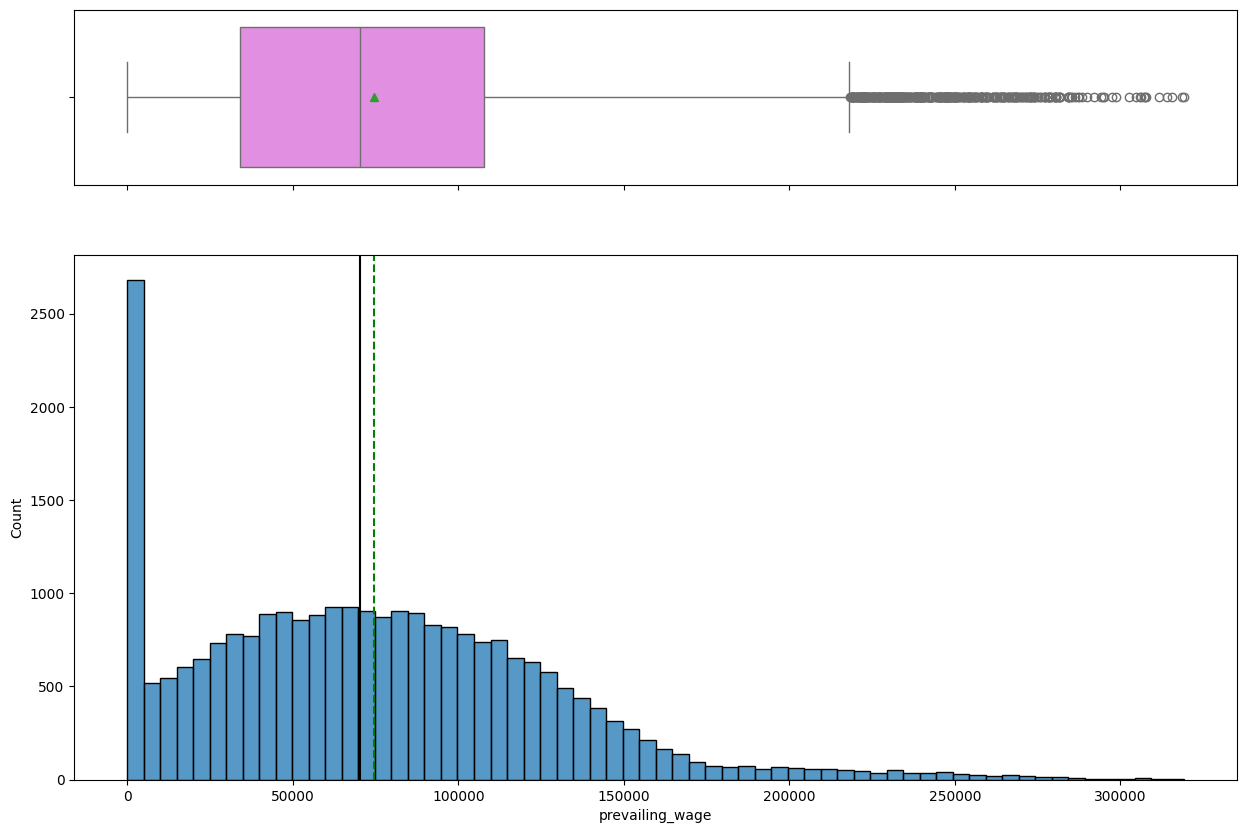

In [ ]:
histogram_boxplot(df,'prevailing_wage')

- The distribution is slightly right skewed.

**Observation on `no_of_employees`**

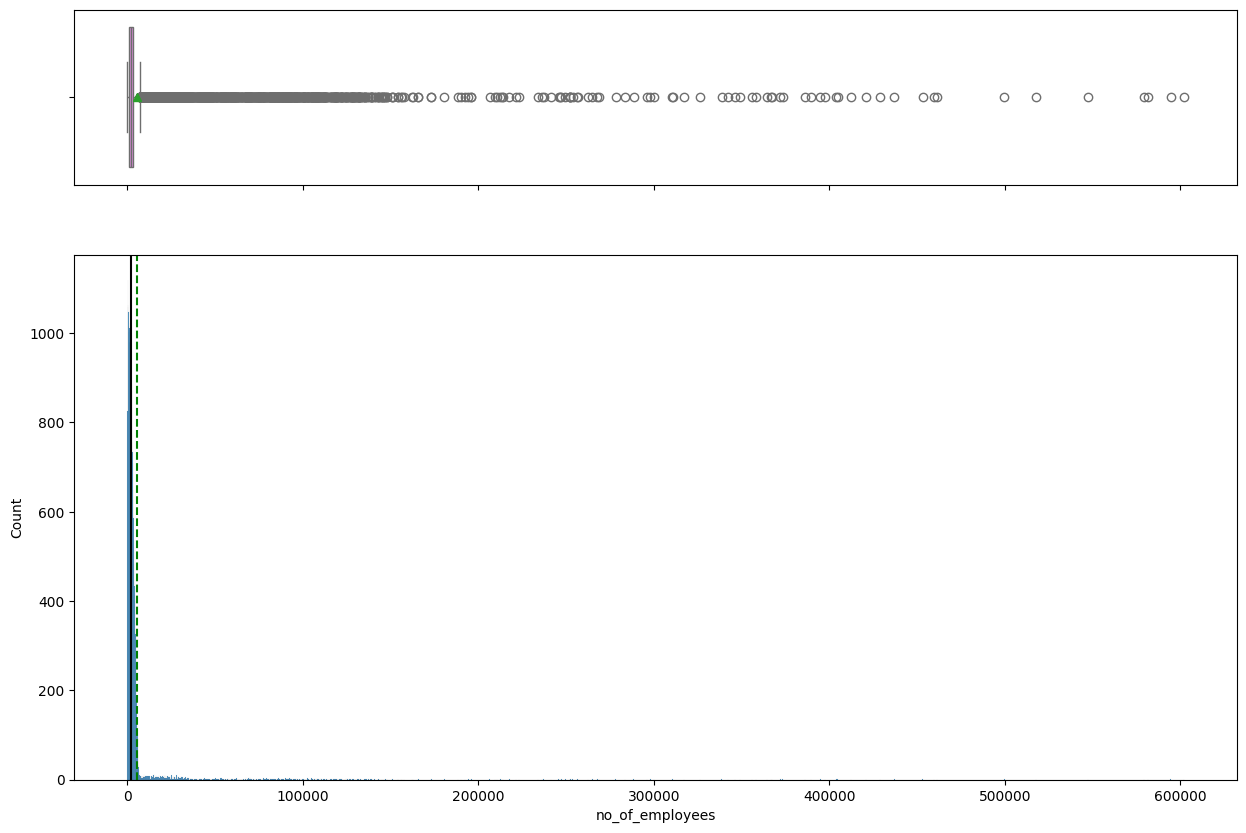

In [ ]:
histogram_boxplot(df,'no_of_employees')

**Observation on `yr_of_estab`**

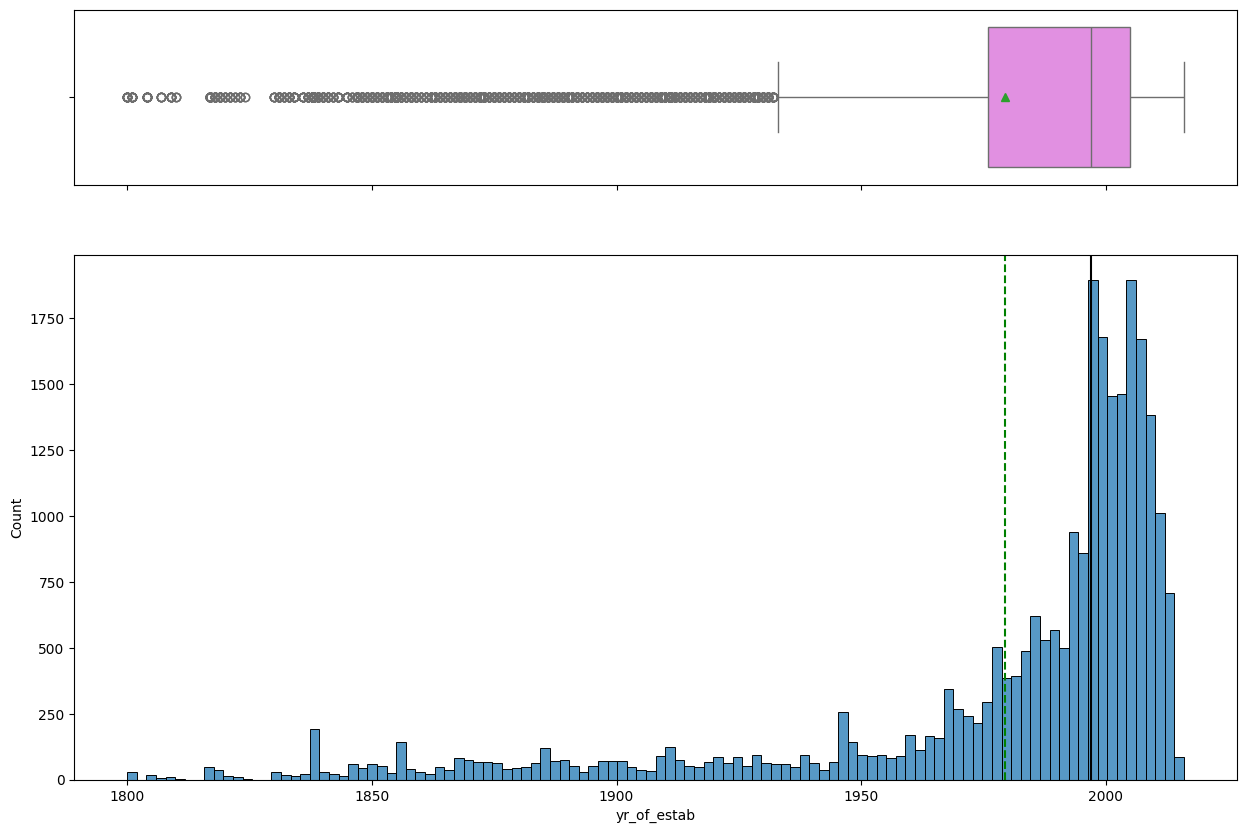

In [ ]:
histogram_boxplot(df,'yr_of_estab')

- Most of the observation is 0 no of employees.

**Observation on `education_of_employee`**

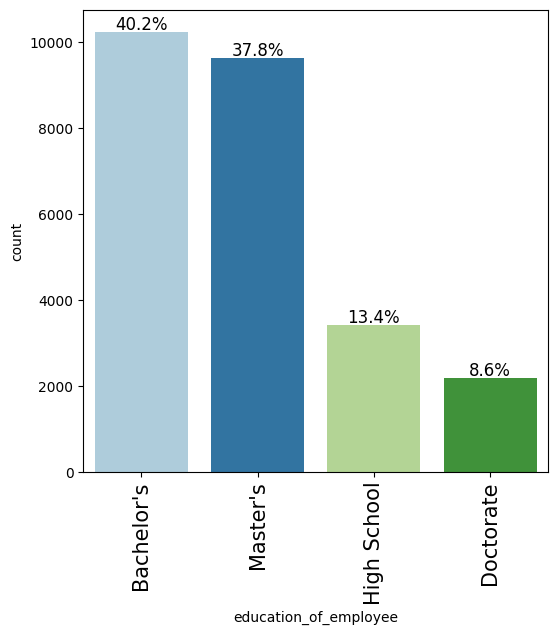

In [ ]:
labeled_barplot(df, 'education_of_employee', perc=True)

-	Most of the employees are having either bachelor’s or master's as their education status.

**Observation on `has_job_experience`**

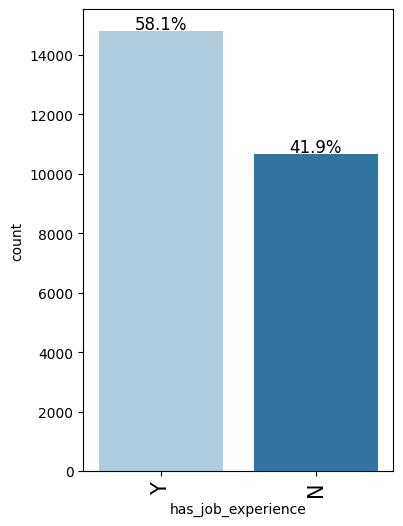

In [ ]:
labeled_barplot(df,'has_job_experience', perc=True)

- Around 58% of the employees have prior job experience rest does not have .

**Observation on `requires_job_training`**

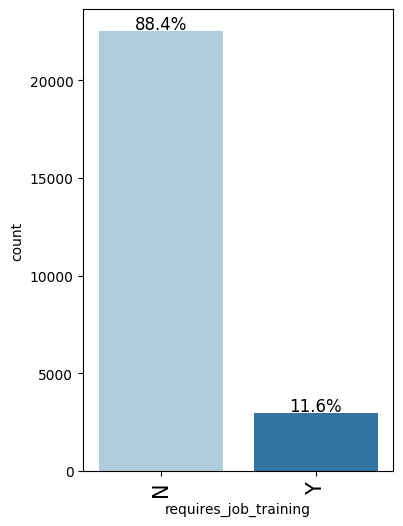

In [ ]:
labeled_barplot(df,'requires_job_training',perc=True)

- 88% of the emloyees need job training.

**Observation on `full_time_position`**

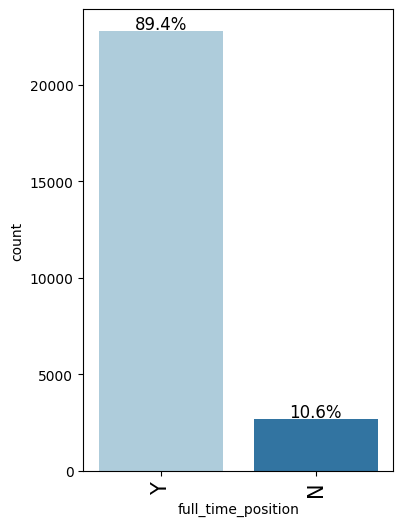

In [ ]:
labeled_barplot(df,'full_time_position',perc=True)

- Around 89.4% of the employees has full time position.

**Observation on `region_of_employment`**

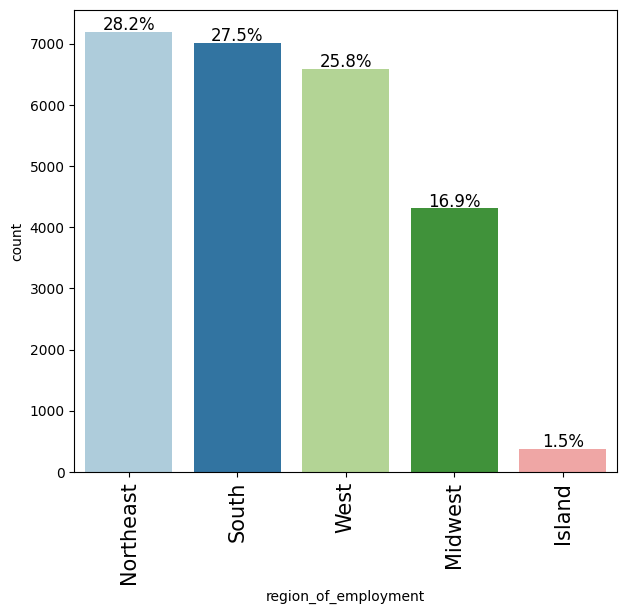

In [ ]:
labeled_barplot(df,'region_of_employment',perc=True)

- Most of the employments were occured in northeast or south or west region.

### Bivariate Analysis

In [ ]:
df1=Data.copy()
df1["has_job_experience"] = df1["has_job_experience"].apply(lambda x: 1 if x == "Y" else 0)
df1["requires_job_training"] = df1["requires_job_training"].apply(lambda x: 1 if x == "Y" else 0)
df1["full_time_position"] = df1["full_time_position"].apply(lambda x: 1 if x == "Y" else 0)
df1["case_status"] = df1["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

In [ ]:
# Define labeling function
def label_education(education):
    if education == "Bachelor's":
        return 1
    elif education =="Master's":
        return 2
    elif education =="High School":
        return 3
    elif education == "Doctorate":
        return 4
    else:
        return 0

# Apply the labeling function to the dataframe
df1['education_of_employee'] = df1['education_of_employee'].apply(label_education)

In [ ]:
# Define labeling function
def label_continent(continent):
    if continent == 'Asia':
        return 1
    elif continent =='Africa':
        return 2
    elif continent =='North America':
        return 3
    elif continent =='Europe':
        return 4
    elif continent == 'South America':
        return 5
    else:
        return 6

# Apply the labeling function to the dataframe
df1['continent'] = df1['continent'].apply(label_continent)

In [ ]:
#just to validate again if any conflict between new and old columns
print(df1['continent'].value_counts())
print('*'*50)
print(df['continent'].value_counts())

continent
1    16861
4     3732
3     3292
5      852
2      551
6      192
Name: count, dtype: int64
**************************************************
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64


In [ ]:
# Define labeling function
def label_region(region):
    if region == 'West':
        return 1
    elif region =='Northeast':
        return 2
    elif region =='South':
        return 3
    elif region =='Midwest':
        return 4
    elif region == 'Island':
        return 5
    else:
        return 0

# Apply the labeling function to the dataframe
df1['region_of_employment'] = df1['region_of_employment'].apply(label_region)

In [ ]:
#just to validate again if any conflict between new and old columns
print(df1['region_of_employment'].value_counts())
print('*'*50)
print(df['region_of_employment'].value_counts())

region_of_employment
2    7195
3    7017
1    6586
4    4307
5     375
Name: count, dtype: int64
**************************************************
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64


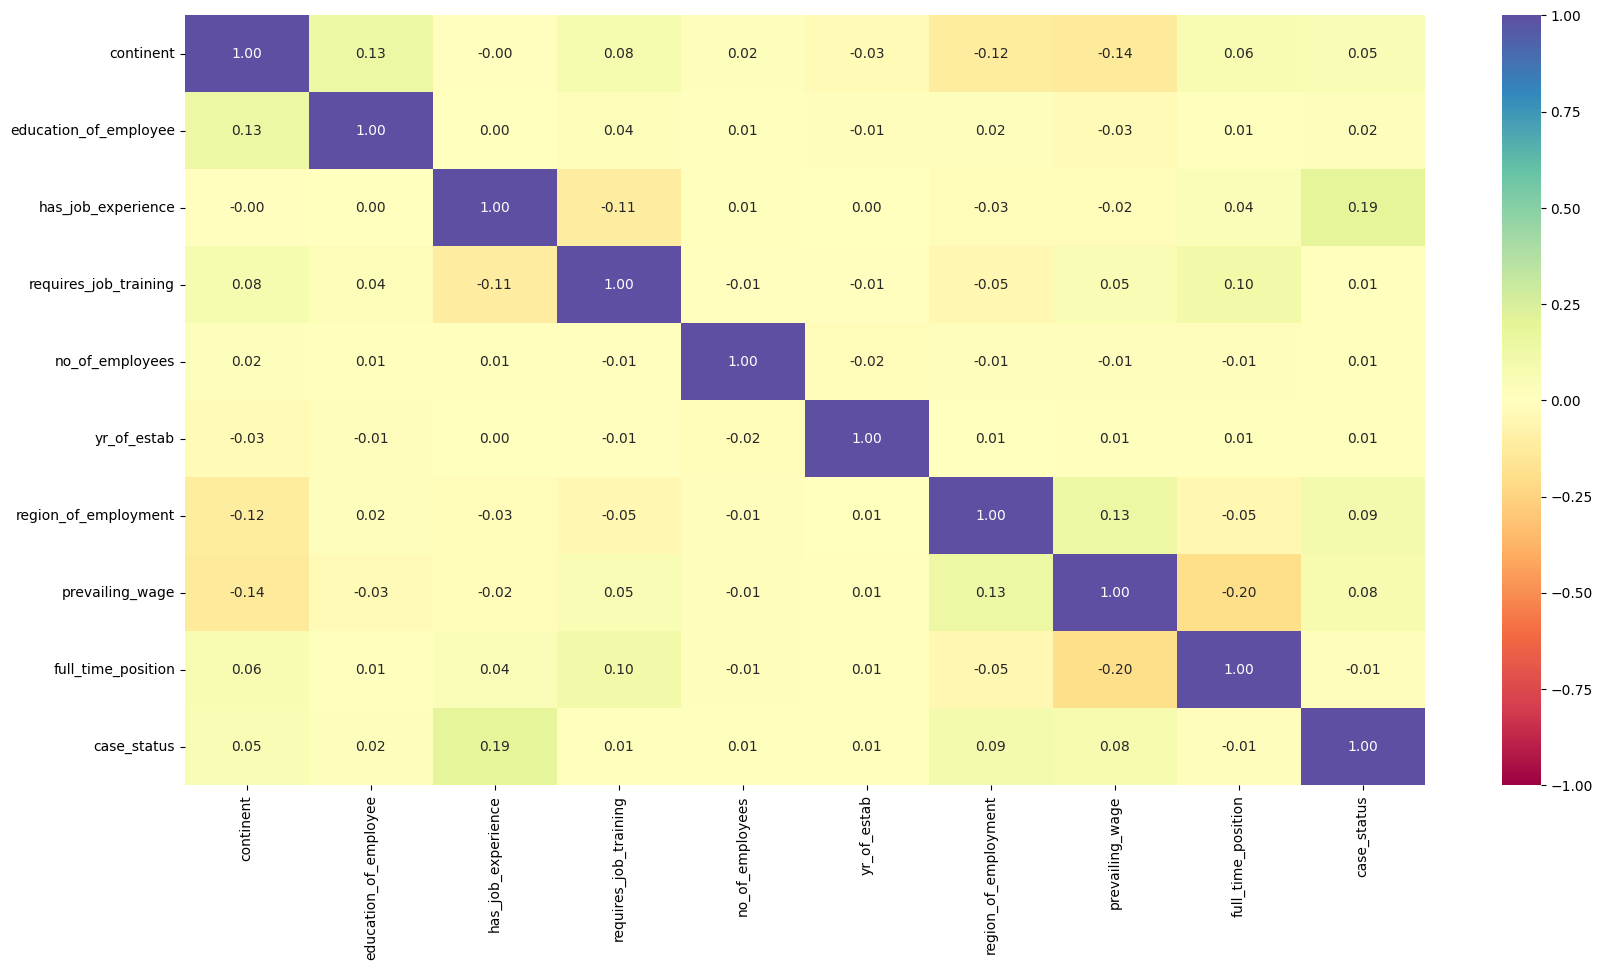

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(numeric_only=True),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap="Spectral")
plt.show()

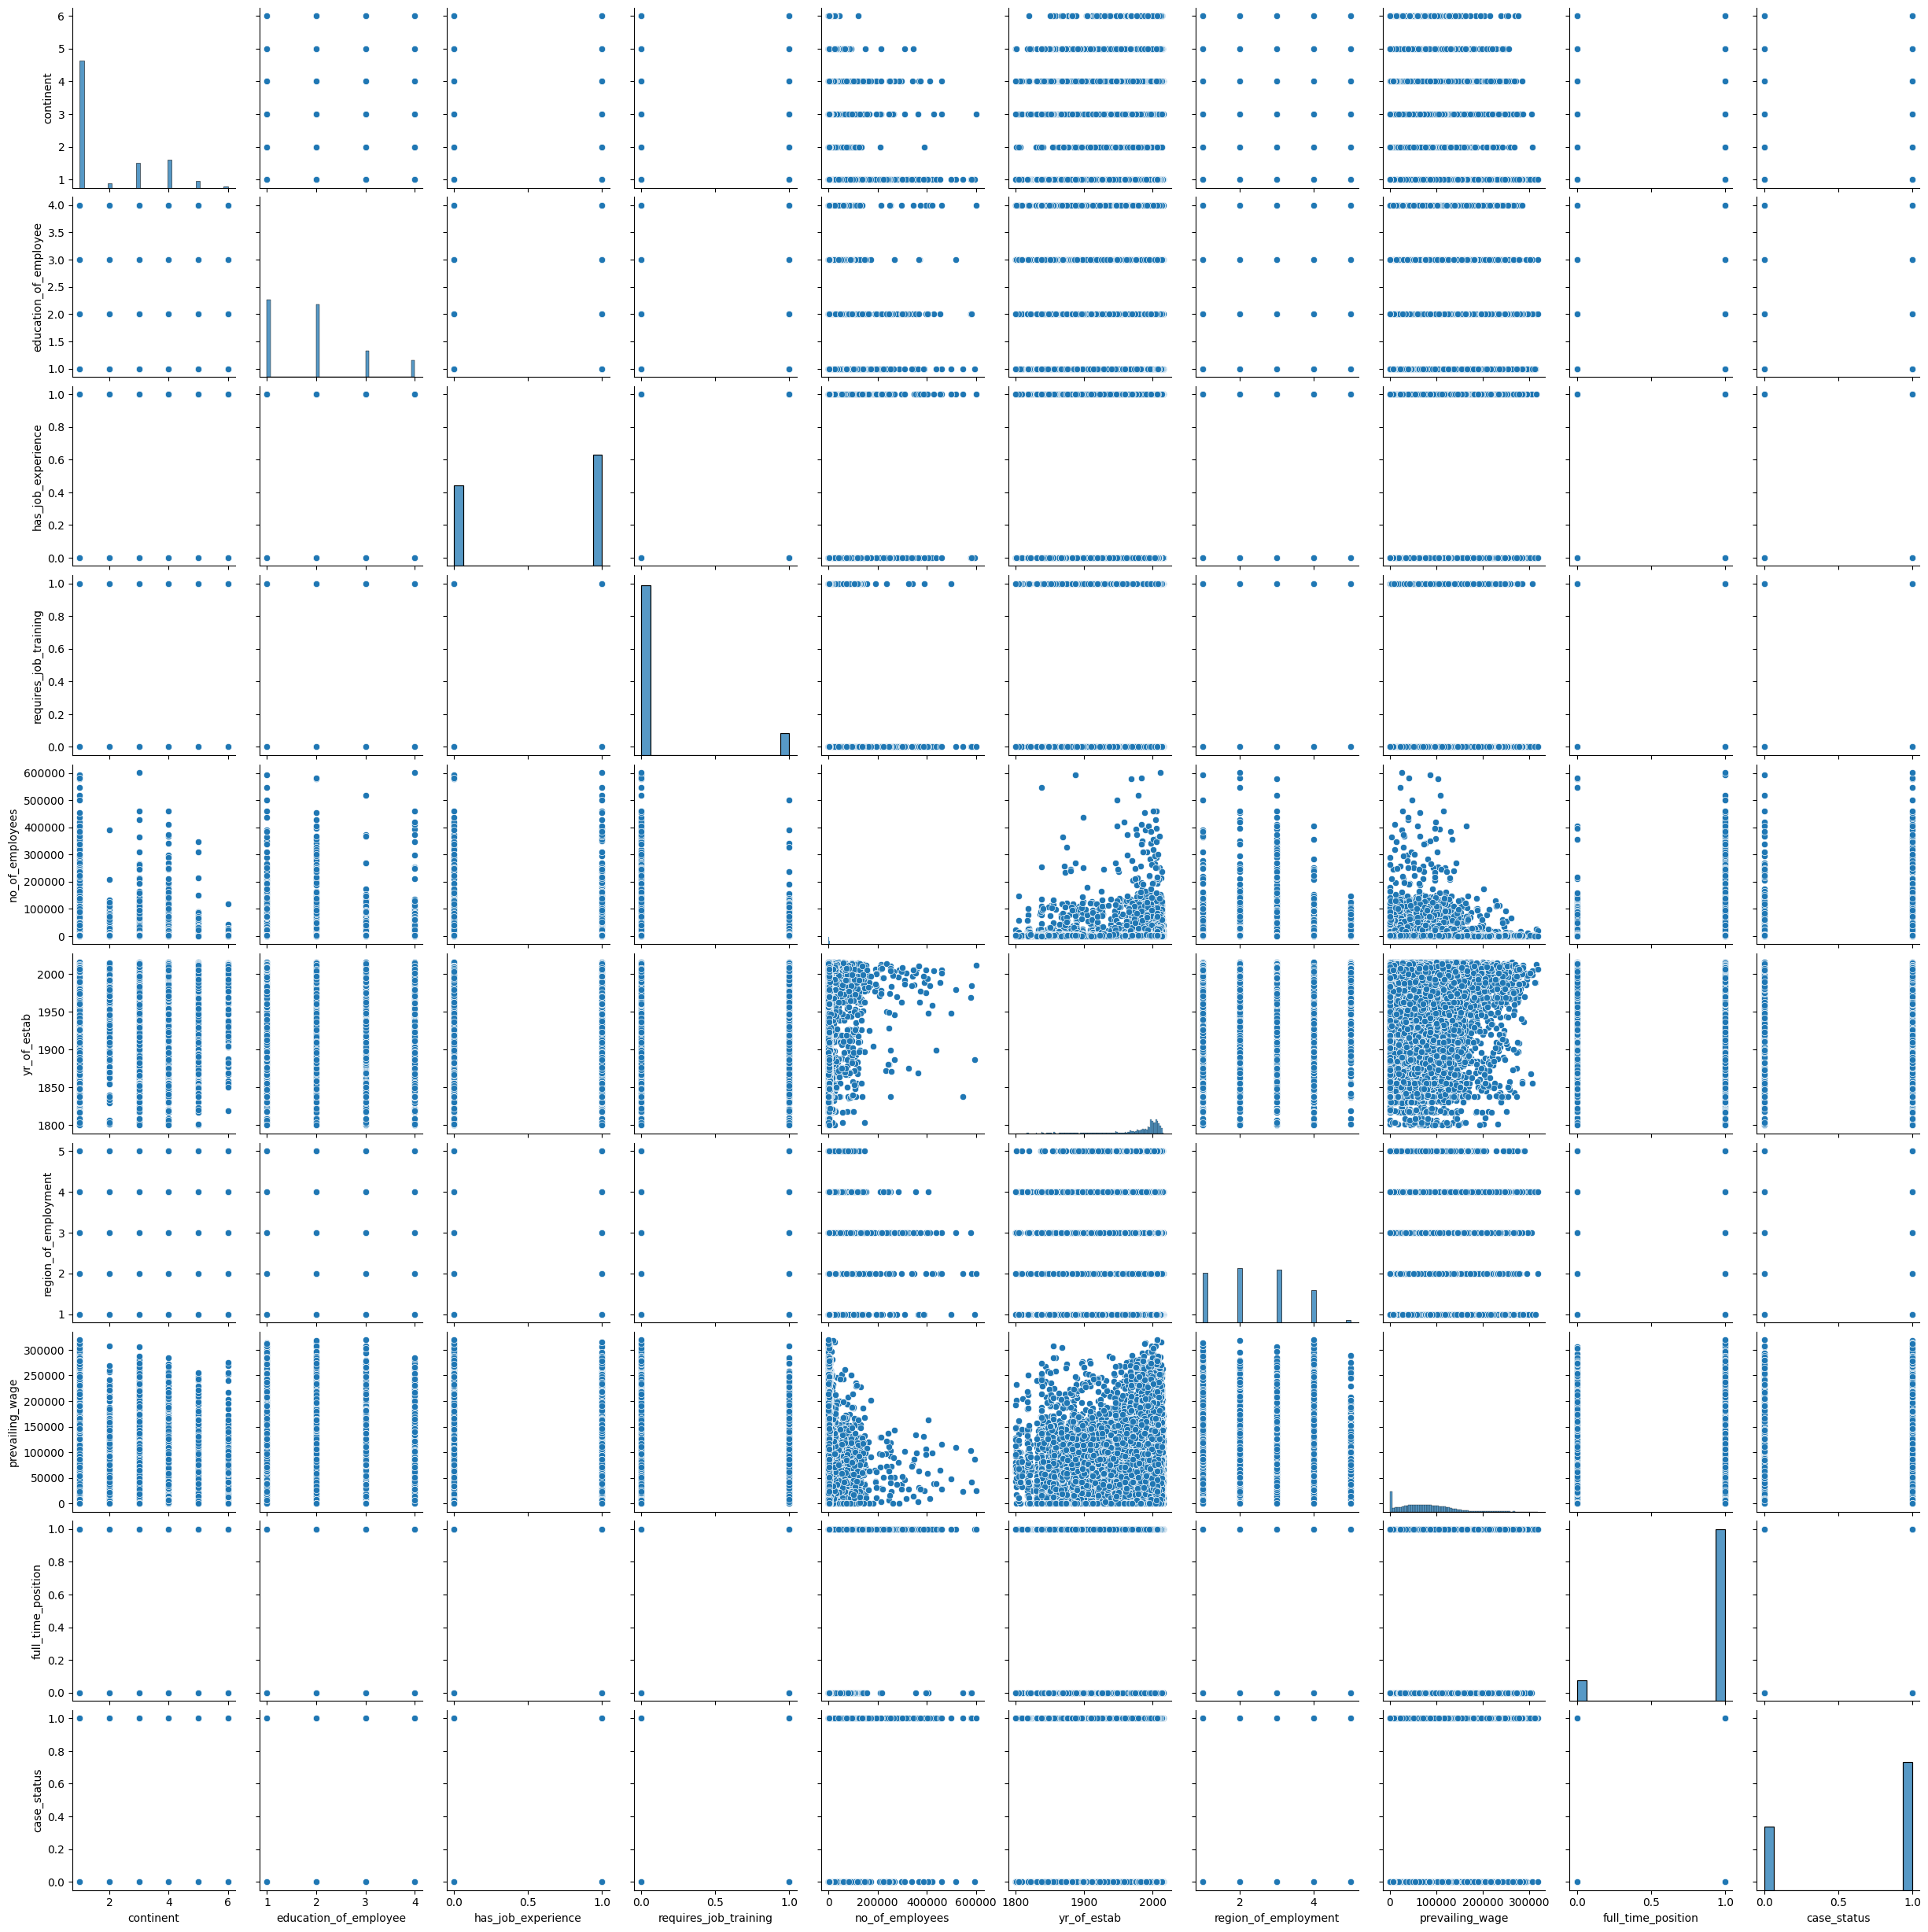

In [ ]:
sns.pairplot(df1)
plt.show()

**Observations**

- Job experience has some positive correlations with case status.
- Region, continental, and full time position have some correlations with the prevailing wage.

#### **Observation on `case status` w.r.t. `job experience`**

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


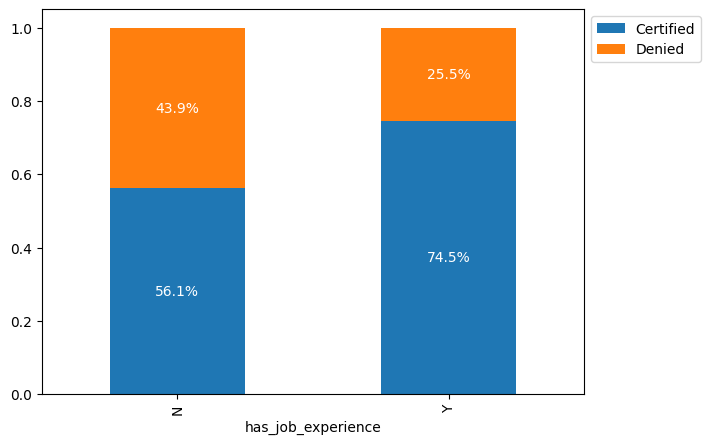

In [ ]:
stacked_barplot(df,'has_job_experience','case_status')

- It is clear that an employee is having job experience, has more probability to get certified.

#### **Observations on `full time position` w.r.t. `prevailing wage`**

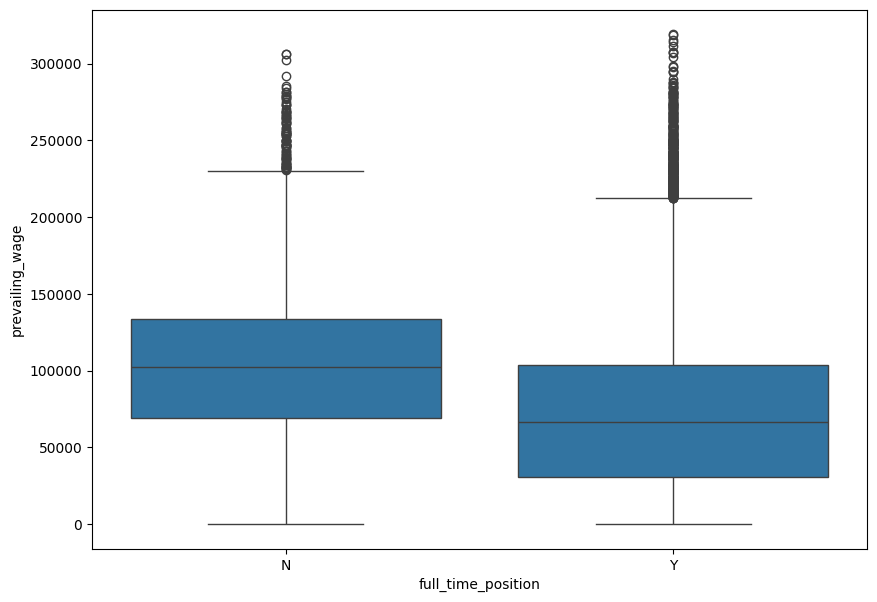

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,y='prevailing_wage',x='full_time_position');

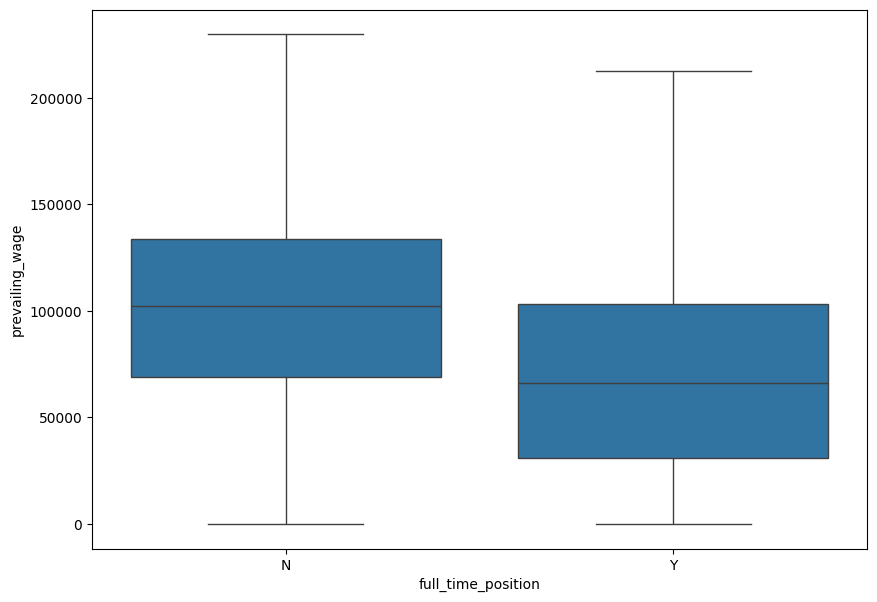

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,y='prevailing_wage',x='full_time_position',showfliers =False);

**Observations**

- Outliers can be observed towards right side.
- Average wages are more for those employees who are in part time position.

#### **Observations on `continent` w.r.t. `prevailing wage`**

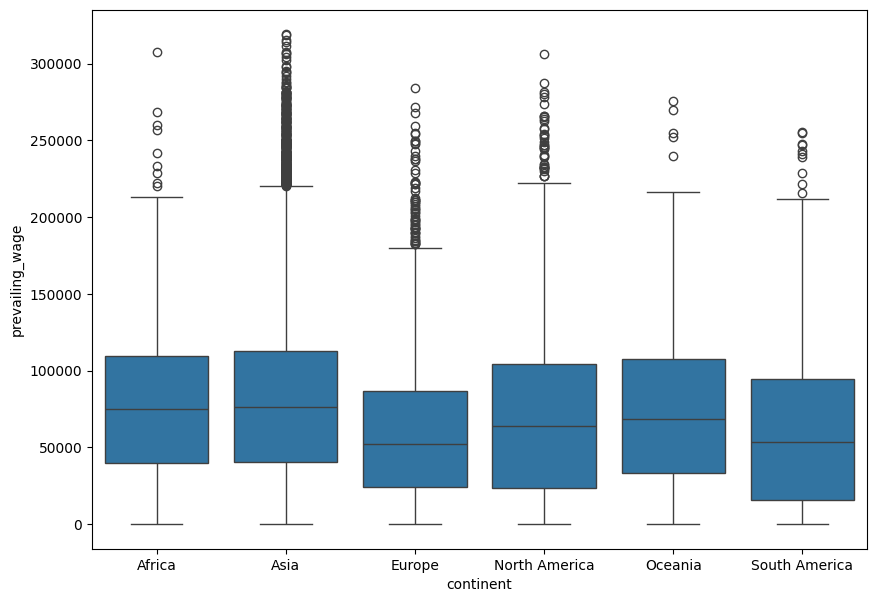

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,y='prevailing_wage',x='continent');

**Observations**

- Outliers can be observed for all the continents.
- Europe and South America has lower average wages.

## Data Preprocessing

### Outlier Detection and Treatment

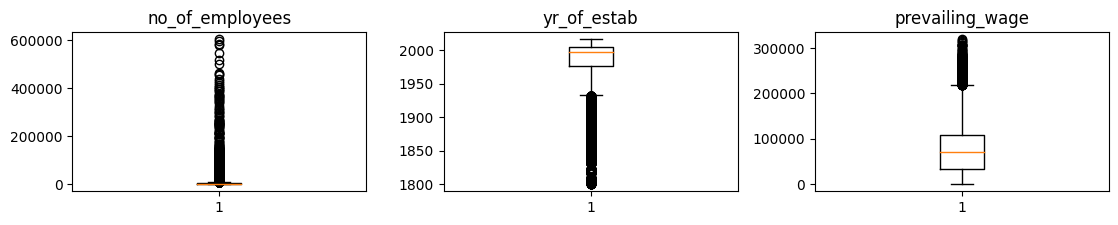

In [ ]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(6, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- There are much a few outliers in the data.
- However, we will not treat them as they are proper values.

### Data Preparataion for model building


- When classification problems exhibit a significant imbalance in the distribution of the target classes, it is good to use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets.
- This is done using the stratify parameter in the train_test_split function.

In [ ]:
df['case_status'] = df['case_status'].apply(lambda x : 1 if x=='Certified' else 0)

X = df.drop(['case_status'],axis=1)
y = df['case_status']

X = pd.get_dummies(X,drop_first=True)

In [ ]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(17836, 21) (7644, 21)


In [ ]:
y.value_counts(1)

,proportion
case_status,
1,0.667896
0,0.332104


In [ ]:
y_test.value_counts(1)

,proportion
case_status,
1,0.667844
0,0.332156


**Let's define function to provide metric scores(accuracy,recall and precision) on train and test set and a function to show confusion matrix so that we do not have use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Model Building
### Model evaluation criterion
**Model can make wrong predictions as:**

- Predicting an employee will get certified and the employee doesn't get certified

- Predicting an employee will not get certified and the employee get certified

**Which case is more important**?

- Predicting that employee will not get certified but he/she certified i.e. not providing valuable to the employee.

**How to reduce this loss i.e need to reduce False Negatives?**

- Company wants Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the company can provide US visa certification to the deserving employes.



### Decision Tree Model

- We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.

- If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

- In this case, we can pass a dictionary {0:0.17,1:0.83} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

- class_weight is a hyperparameter for the decision tree classifier.

In [ ]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.67,1:0.33},random_state=1)

In [ ]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, random_state=1)

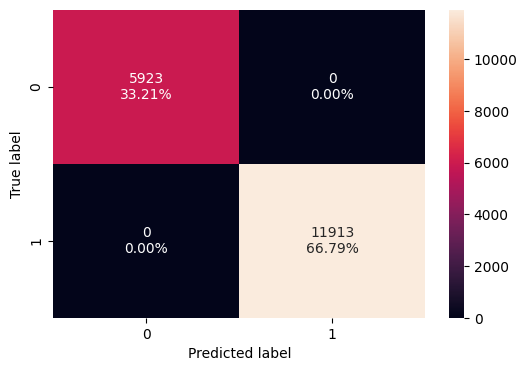

In [ ]:
confusion_matrix_sklearn(dtree, X_train, y_train)

**Confusion Matrix -**

- Employee got certified and the model predicted it correctly that is employee will get certification : True Positive (observed=1,predicted=1)

- Employee didn't get certified and the model predicted employee will get certification : False Positive (observed=0,predicted=1)

- Employee didn't get certified and the model predicted employee will not get certification : True Negative (observed=0,predicted=0)

- Employee got certified and the model predicted that employee will not get certification : False Negative (observed=1,predicted=0)

In [ ]:
dtree_model_train_perf=model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


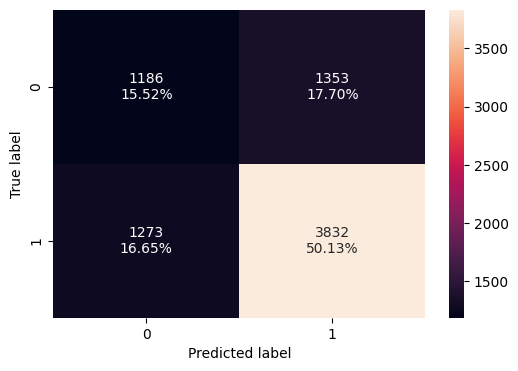

In [ ]:
confusion_matrix_sklearn(dtree, X_test, y_test)

In [ ]:
dtree_model_test_perf=model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.656463  0.750637   0.739055  0.744801


- Decision tree is working well on the training data but is not able to generalize well on the test data concerning the recall.

### Bagging Classifier

In [ ]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

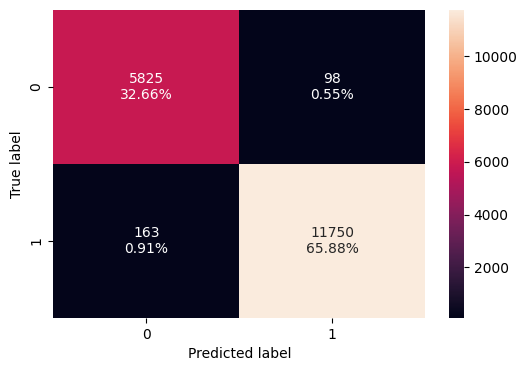

In [ ]:
confusion_matrix_sklearn(bagging, X_train, y_train)

In [ ]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.985367  0.986317   0.991729  0.989016


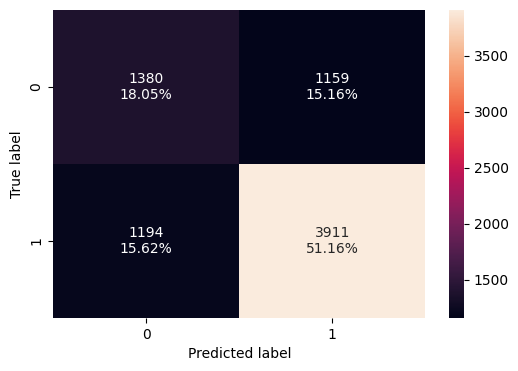

In [ ]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [ ]:
bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.692177  0.766112     0.7714  0.768747


- Bagging classifier is overfitting on the training set and is performing poorly on the test set in terms of recall.

**Bagging Classifier with weighted decision tree**

In [ ]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.67,1:0.33},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.67,
                                                                      1: 0.33},
                                                        random_state=1),
                  random_state=1)

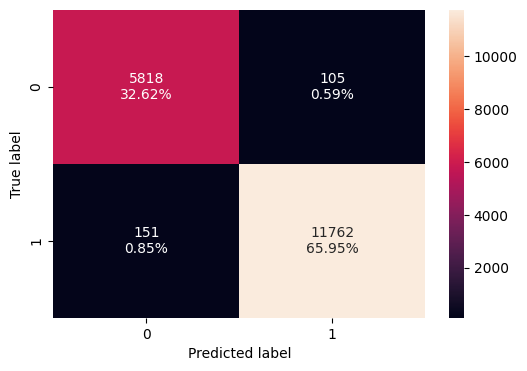

In [ ]:
confusion_matrix_sklearn(bagging_wt,X_train,y_train)

In [ ]:
bagging_wt_model_train_perf=model_performance_classification_sklearn(bagging_wt,X_train,y_train)
print("Training performance \n",bagging_wt_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.985647  0.987325   0.991152  0.989235


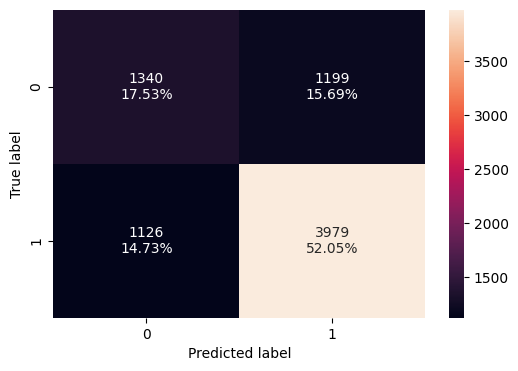

In [ ]:
confusion_matrix_sklearn(bagging_wt,X_test,y_test)

In [ ]:
bagging_wt_model_test_perf=model_performance_classification_sklearn(bagging_wt, X_test, y_test)
print("Testing performance \n",bagging_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0   0.69584  0.779432   0.768443  0.773899


- Bagging classifier with a weighted decision tree is giving very good accuracy and prediction but is not able to generalize well on test data in terms of recall.

### Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

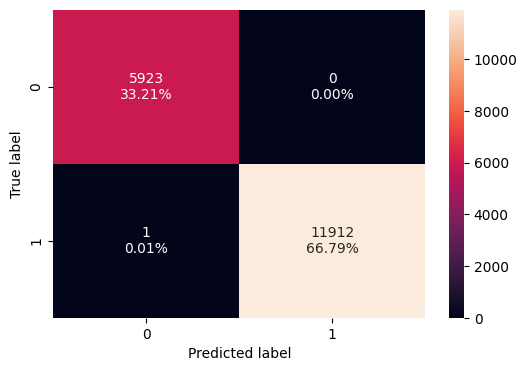

In [ ]:
confusion_matrix_sklearn(rf,X_train,y_train)

In [ ]:
rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)
print("Training performance \n",rf_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.999944  0.999916        1.0  0.999958


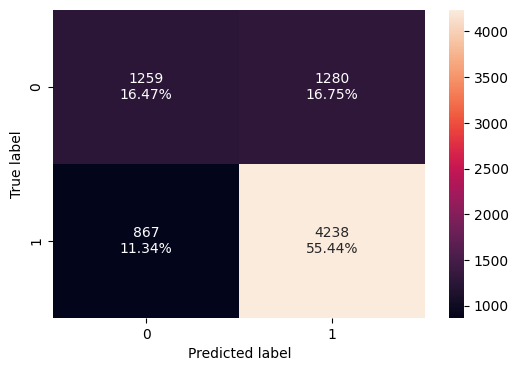

In [ ]:
confusion_matrix_sklearn(rf,X_test,y_test)

In [ ]:
rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)
print("Testing performance \n",rf_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.719126  0.830167   0.768032  0.797891


- Random Forest has performed well in terms of accuracy and precision, but it is not able to generalize well on the test data in terms of recall.

**Random forest with class weights**

In [ ]:
rf_wt = RandomForestClassifier(class_weight={0:0.67,1:0.33}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.67, 1: 0.33}, random_state=1)

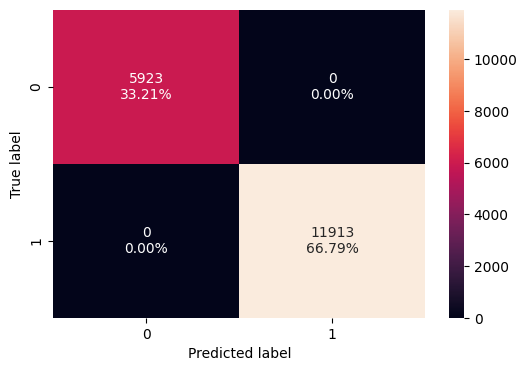

In [ ]:
confusion_matrix_sklearn(rf_wt, X_train,y_train)

In [ ]:
rf_wt_model_train_perf=model_performance_classification_sklearn(rf_wt, X_train,y_train)
print("Training performance \n",rf_wt_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


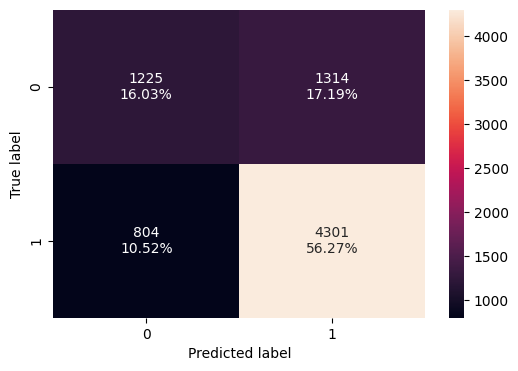

In [ ]:
confusion_matrix_sklearn(rf_wt, X_test,y_test)

In [ ]:
rf_wt_model_test_perf=model_performance_classification_sklearn(rf_wt, X_test,y_test)
print("Testing performance \n",rf_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0   0.72292  0.842507   0.765984  0.802425


- There is not much improvement in metrics of weighted random forest as compared to the unweighted random forest. Model is over fitting.

### Boosting Technique

- We are going to build 3 ensemble models here - AdaBoost Classifier, Gradient Boosting Classifier and XGBoost Classifier.
- First, let's build these models with default parameters and then use hyperparameter tuning to optimize the model performance.
- We will calculate all three metrics - Accuracy, Precision and Recall but the metric of interest here is recall.
- `Recall` - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of predicting a defaulter as non defaulter

#### AdaBoost Classifier

In [ ]:
ab_Classifier=AdaBoostClassifier(random_state=1)
ab_Classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

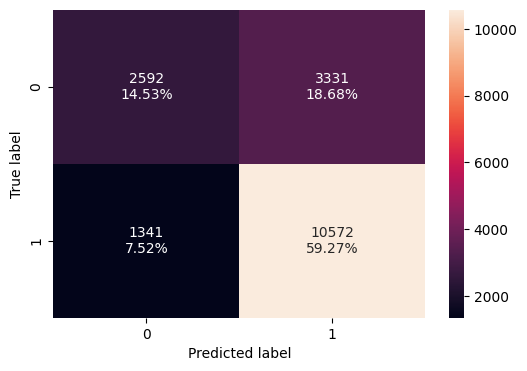

In [ ]:
confusion_matrix_sklearn(ab_Classifier,X_train,y_train)

In [ ]:
ab_Classifier_model_train_perf = model_performance_classification_sklearn(ab_Classifier, X_train,y_train)
print("Training performance \n",ab_Classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.738058  0.887434   0.760411  0.819027


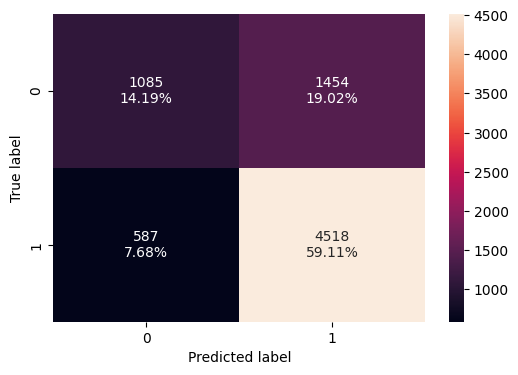

In [ ]:
confusion_matrix_sklearn(ab_Classifier,X_test,y_test)

In [ ]:
ab_Classifier_model_test_perf = model_performance_classification_sklearn(ab_Classifier, X_test,y_test)
print("Testing performance \n",ab_Classifier_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.732993  0.885015    0.75653  0.815744


- AdaBoost is generalizing well but it is giving poor performance, in terms of accuracy and precision.

**AdaBoosting with class weights**

In [ ]:
ab_Classifier_wt = AdaBoostClassifier(base_estimator=dtree, random_state=1)
ab_Classifier_wt.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.67,
                                                                       1: 0.33},
                                                         random_state=1),
                   random_state=1)

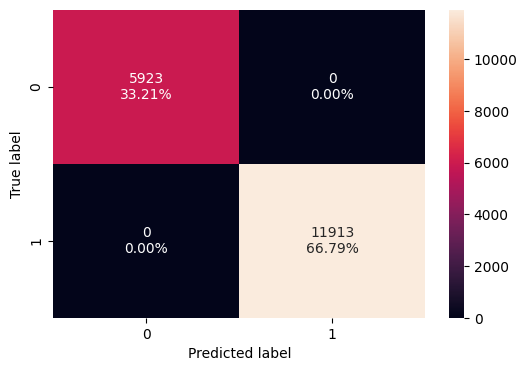

In [ ]:
confusion_matrix_sklearn(ab_Classifier_wt,X_train,y_train)

In [ ]:
ab_Classifier_wt_model_train_perf = model_performance_classification_sklearn(ab_Classifier_wt, X_train,y_train)
print("Training performance \n",ab_Classifier_wt_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


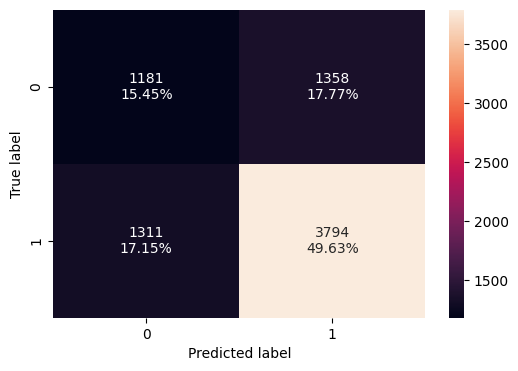

In [ ]:
confusion_matrix_sklearn(ab_Classifier_wt,X_test,y_test)

In [ ]:
ab_Classifier_wt_model_test_perf = model_performance_classification_sklearn(ab_Classifier_wt, X_test,y_test)
print("Testing performance \n",ab_Classifier_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.650837  0.743193   0.736413  0.739787


- With class weight it is giving poor performance. F1 score has dropped. Also, model is overfitting.

#### Gradient boosting

In [ ]:
gb_estimator=GradientBoostingClassifier(random_state=1)
gb_estimator.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [ ]:
gb_estimator_model_train_perf = model_performance_classification_sklearn(gb_estimator, X_train,y_train)
print("Training performance \n",gb_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.759419  0.882901   0.784106  0.830576


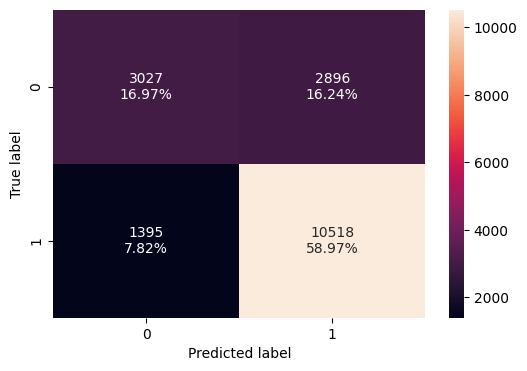

In [ ]:
confusion_matrix_sklearn(gb_estimator,X_train,y_train)

In [ ]:
gb_estimator_model_test_perf = model_performance_classification_sklearn(gb_estimator, X_test, y_test)
print("Testing performance \n",gb_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision       F1
0  0.744636  0.873262   0.773555  0.82039


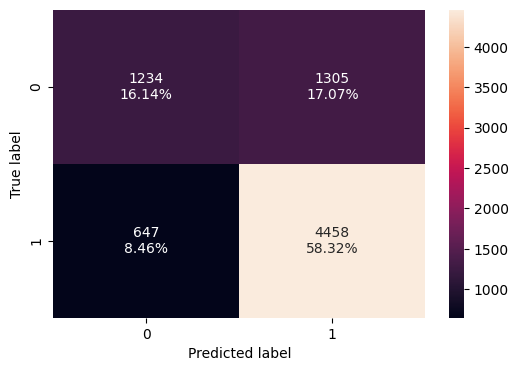

In [ ]:
confusion_matrix_sklearn(gb_estimator,X_test,y_test)

- Gradient Boost is generalizing well but it is giving poor performance, in terms of accuracy and precision.

#### XgBoosting Classifier

In [ ]:
xgb_estimator=XGBClassifier(random_state=1, verbosity = 0)
xgb_estimator.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
xgb_estimator_model_train_perf = model_performance_classification_sklearn(xgb_estimator, X_train, y_train)
print("Training performance \n",xgb_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.843575  0.931084   0.849246  0.888284


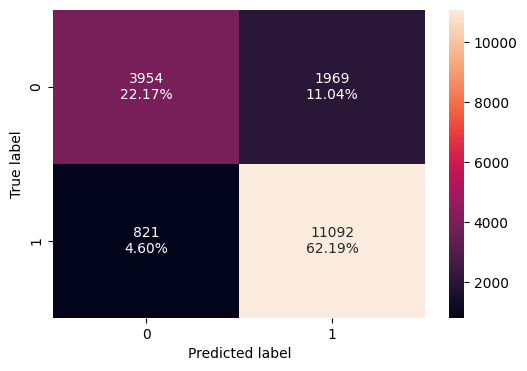

In [ ]:
confusion_matrix_sklearn(xgb_estimator,X_train,y_train)

In [ ]:
xgb_estimator_model_test_perf = model_performance_classification_sklearn(xgb_estimator, X_test,y_test)
print("Testing performance \n",xgb_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.728545  0.855044   0.765789  0.807959


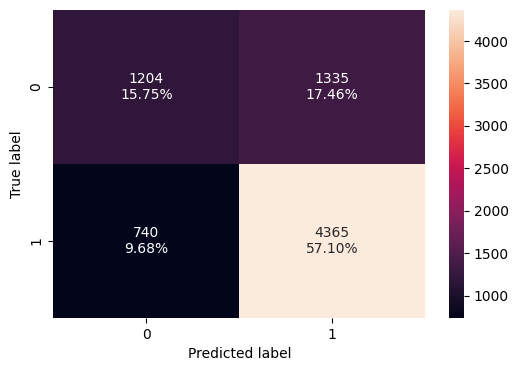

In [ ]:
confusion_matrix_sklearn(xgb_estimator,X_test,y_test)

**With default parameters:**
- AdaBoost classifier has better test accuracy among these 3 models.
- GB classifier has least test accuracy and test recall.
- The model has good f1 score and able to generalize will. However, the precision and acuracy level is low.

## Tuning Models

### Using GridSearch for Hyperparameter tuning model

- Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search.
- Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
- It is an exhaustive search that is performed on a the specific parameter values of a model.
- The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

### Tuning Decision Tree

In [ ]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.67,1:0.33},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30),
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, max_depth=2,
                       max_leaf_nodes=2, min_impurity_decrease=0.0001,
                       random_state=1)

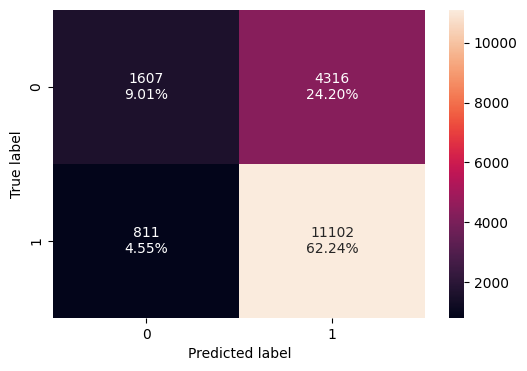

In [ ]:
confusion_matrix_sklearn(dtree_estimator, X_train,y_train)

In [ ]:
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator, X_train,y_train)
print("Training performance \n",dtree_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.712548  0.931923   0.720067  0.812411


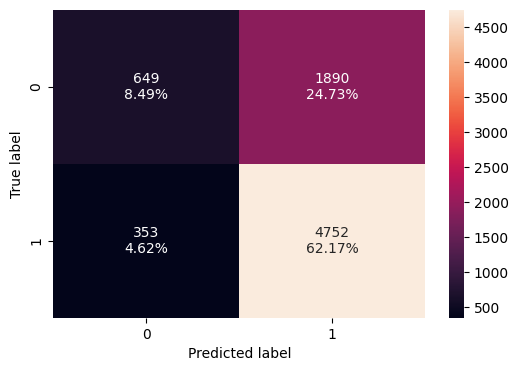

In [ ]:
confusion_matrix_sklearn(dtree_estimator, X_test,y_test)

In [ ]:
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
print("Testing performance \n",dtree_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.706567  0.930852   0.715447  0.809058


-	Overfitting in decision tree has reduced and the recall score also significantly good. Overall model is able to generalize well. However, accuracy and precision are still low.

In [ ]:
# importance of features in the tree building

print(pd.DataFrame(dtree_estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                   Imp
education_of_employee_High School  1.0
no_of_employees                    0.0
has_job_experience_Y               0.0
unit_of_wage_Year                  0.0
unit_of_wage_Week                  0.0
unit_of_wage_Month                 0.0
region_of_employment_West          0.0
region_of_employment_South         0.0
region_of_employment_Northeast     0.0
region_of_employment_Midwest       0.0
requires_job_training_Y            0.0
education_of_employee_Master's     0.0
yr_of_estab                        0.0
education_of_employee_Doctorate    0.0
continent_South America            0.0
continent_Oceania                  0.0
continent_North America            0.0
continent_Europe                   0.0
continent_Asia                     0.0
prevailing_wage                    0.0
full_time_position_Y               0.0


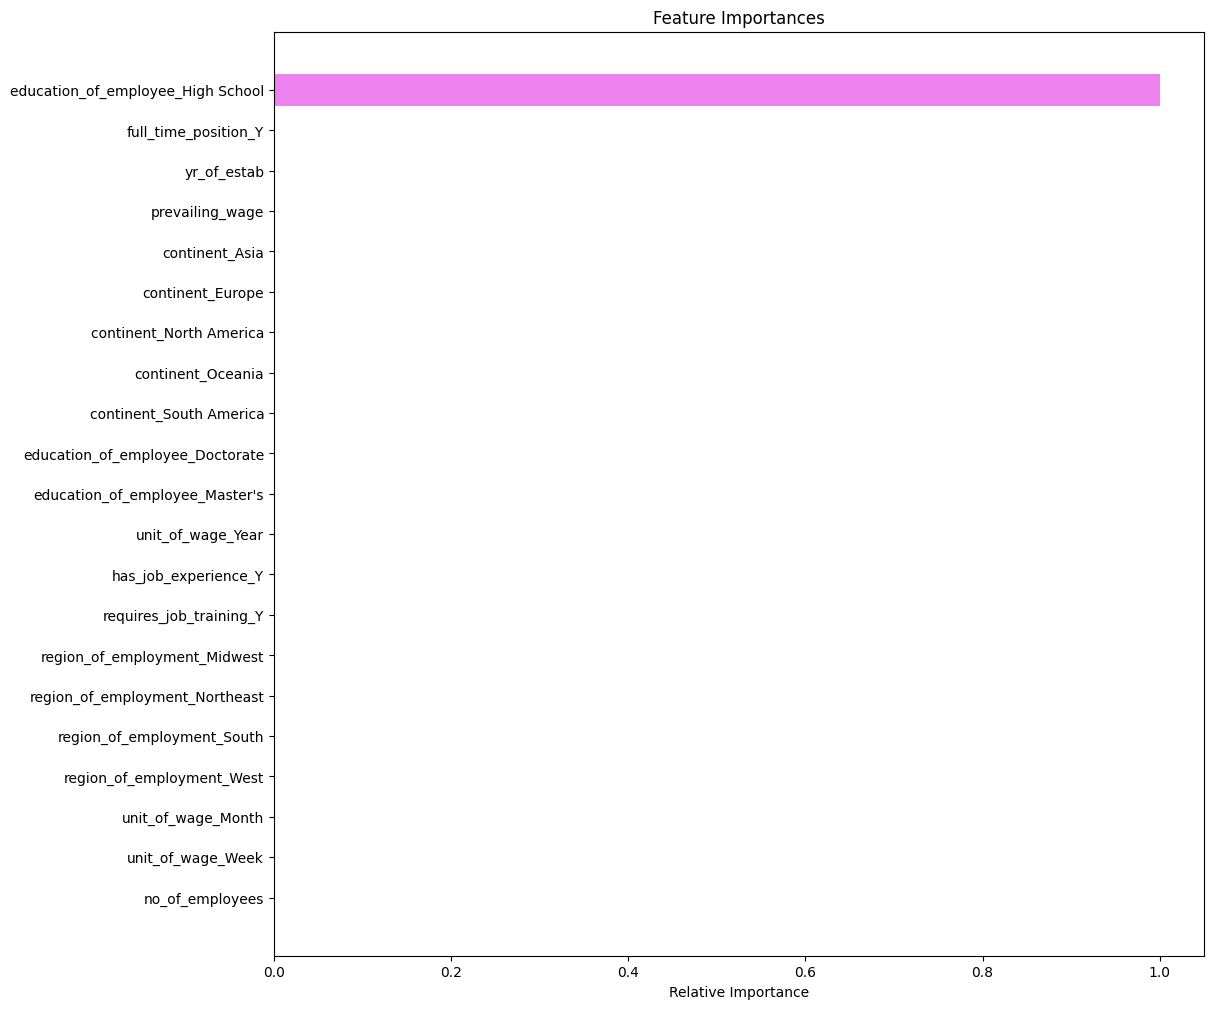

In [ ]:
feature_names = X_train.columns
importances = dtree_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Model is only considering education of the employee. Hence, the performance is not good.

### Tuning Bagging Classifier

In [ ]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(class_weight={0:0.67,1:0.33},random_state=1)
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'recall', cv = 5)
grid.fit(X_train, y_train)

## getting the best estimator
bagging_estimator_tuned  = grid.best_estimator_
bagging_estimator_tuned.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.67,
                                                                      1: 0.33},
                                                        random_state=1),
                  max_features=0.7, n_estimators=101, random_state=1)

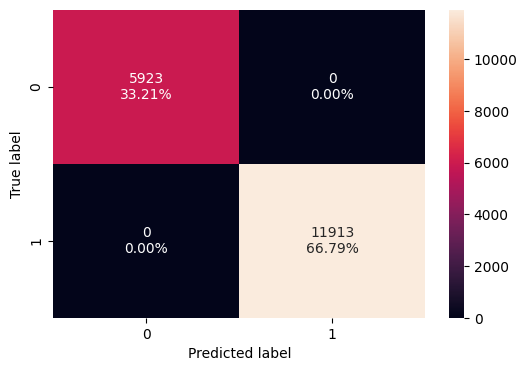

In [ ]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_train,y_train)

In [ ]:
bagging_estimator_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned, X_train,y_train)
print("Training performance \n",bagging_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


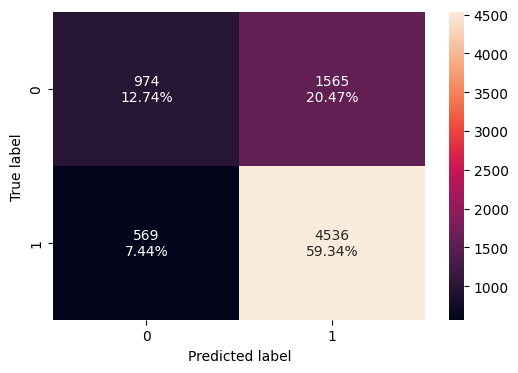

In [ ]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_test,y_test)

In [ ]:
bagging_estimator_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned, X_test, y_test)
print("Testing performance \n",bagging_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.720827  0.888541   0.743485  0.809566


- Recall and accuracy has improved but the precision of the model has dropped and also it's a over fit model. Overall the model is making many mistakes.

### Tuning Random Forest

In [ ]:
# Choose the type of classifier.
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
        "n_estimators": [110,251,501],
        "min_samples_leaf": np.arange(1, 6,1),
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.7,0.9,None],
}

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring='recall',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', max_samples=0.7, min_samples_leaf=5,
                       n_estimators=110, random_state=1)

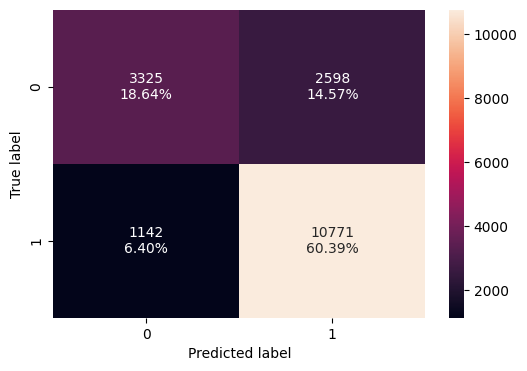

In [ ]:
confusion_matrix_sklearn(rf_estimator_tuned, X_train,y_train)

In [ ]:
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator_tuned, X_train,y_train)
print("Training performance \n",rf_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.790312  0.904138    0.80567  0.852069


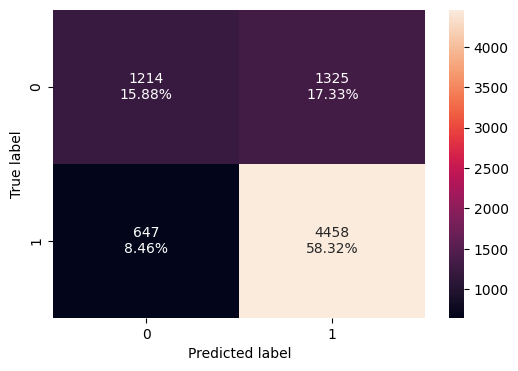

In [ ]:
confusion_matrix_sklearn(rf_estimator_tuned, X_test,y_test)

In [ ]:
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator_tuned, X_test, y_test)
print("Testing performance \n",rf_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0   0.74202  0.873262    0.77088  0.818883


- Random forest after tuning has given better performance as un-tuned random forest. It has good f1 and recall score. However, precision and accuracy is still low.

In [ ]:
# importance of features in the tree building

print(pd.DataFrame(rf_estimator_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
prevailing_wage                    0.184299
education_of_employee_High School  0.166817
no_of_employees                    0.132792
yr_of_estab                        0.110341
has_job_experience_Y               0.096840
education_of_employee_Master's     0.075073
unit_of_wage_Year                  0.038706
education_of_employee_Doctorate    0.036352
continent_Europe                   0.030441
region_of_employment_Midwest       0.018669
continent_Asia                     0.017038
region_of_employment_West          0.016712
full_time_position_Y               0.014349
region_of_employment_South         0.013504
continent_North America            0.013111
region_of_employment_Northeast     0.013096
requires_job_training_Y            0.012124
continent_South America            0.006754
unit_of_wage_Week                  0.001443
continent_Oceania                  0.001044
unit_of_wage_Month                 0.000493


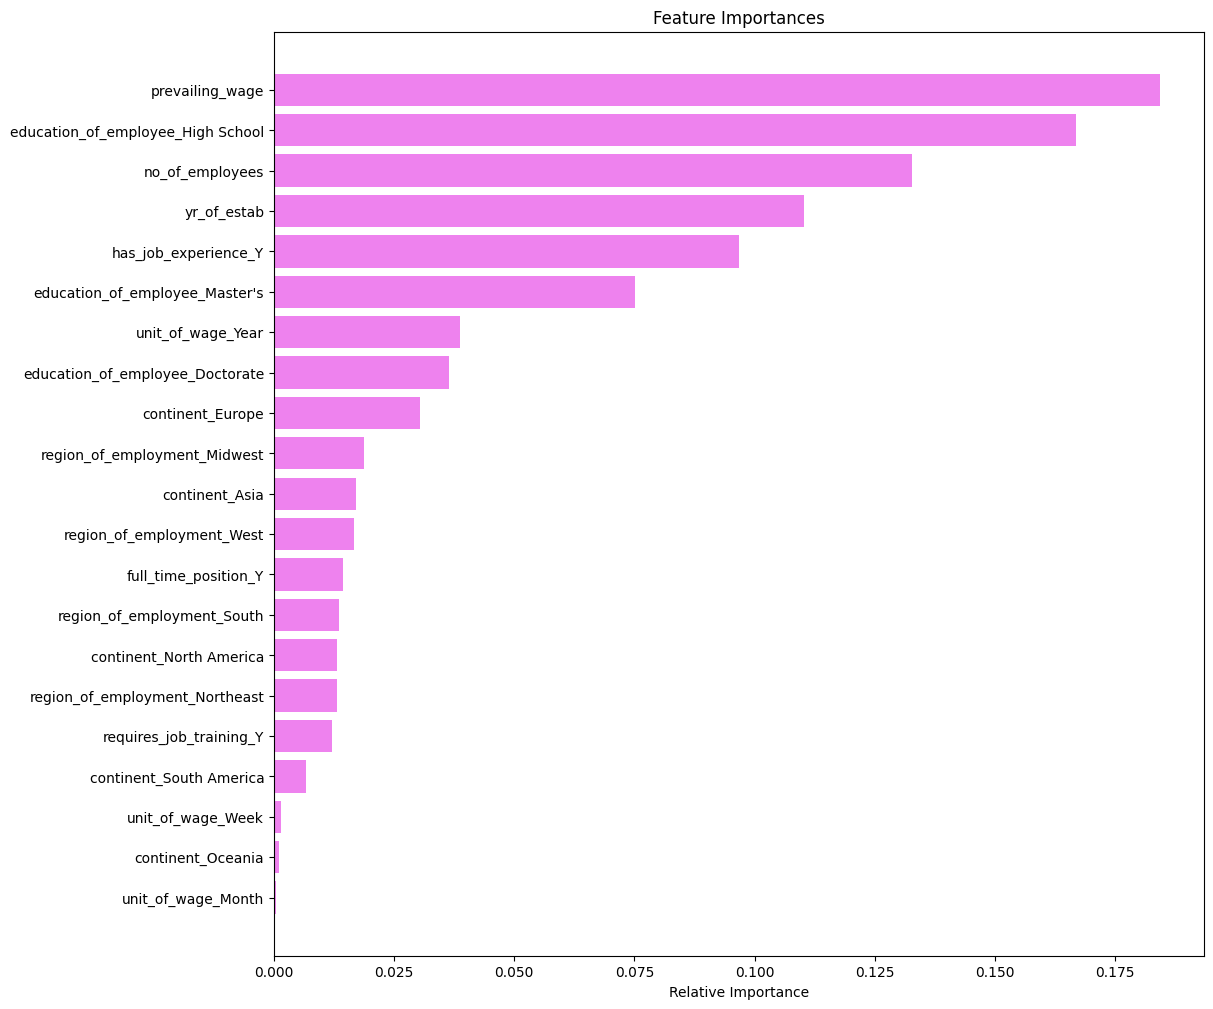

In [ ]:
feature_names = X_train.columns
importances = rf_estimator_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Model has considered the Prevailing wage and high school education as most important features followed by no of employees, year of establishment and job experience.

### Tuning Boosting

- An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

#### Tuning Adaboosting

In [ ]:
# Choose the type of classifier.
ab_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10,100,10),
              'learning_rate': [1, 0.1, 0.5, 0.01],
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
ab_tuned.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=30, random_state=1)

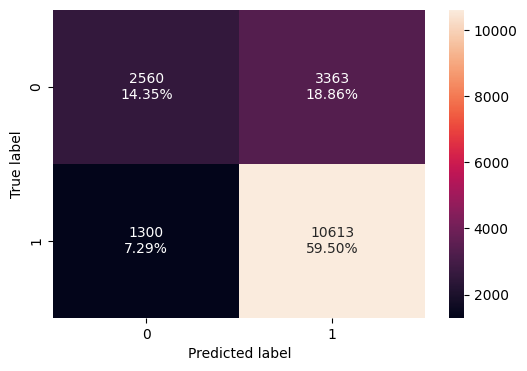

In [ ]:
confusion_matrix_sklearn(ab_tuned, X_train,y_train)

In [ ]:
ab_tuned_model_train_perf = model_performance_classification_sklearn(ab_tuned, X_train,y_train)
print("Training performance \n",ab_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.738562  0.890876   0.759373  0.819885


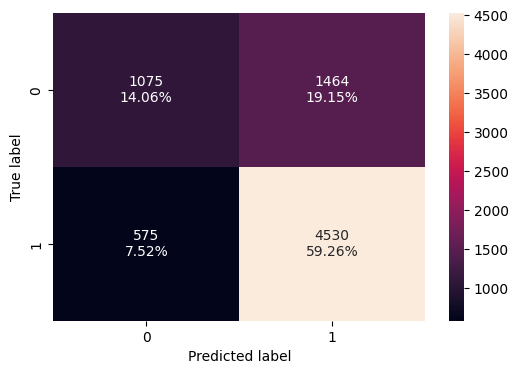

In [ ]:
confusion_matrix_sklearn(ab_tuned, X_test,y_test)

In [ ]:
ab_tuned_model_test_perf = model_performance_classification_sklearn(ab_tuned, X_test,y_test)
print("Testing performance \n",ab_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision       F1
0  0.733255  0.887365   0.755756  0.81629


- Model has generalized well with high recall and f1 score.

In [ ]:
# importance of features in the tree building

print(pd.DataFrame(ab_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
education_of_employee_Master's     0.133333
has_job_experience_Y               0.133333
prevailing_wage                    0.100000
continent_Europe                   0.100000
region_of_employment_Midwest       0.100000
education_of_employee_Doctorate    0.100000
education_of_employee_High School  0.100000
region_of_employment_South         0.066667
unit_of_wage_Year                  0.033333
region_of_employment_West          0.033333
full_time_position_Y               0.033333
yr_of_estab                        0.033333
continent_North America            0.033333
requires_job_training_Y            0.000000
continent_South America            0.000000
region_of_employment_Northeast     0.000000
continent_Oceania                  0.000000
unit_of_wage_Month                 0.000000
unit_of_wage_Week                  0.000000
continent_Asia                     0.000000
no_of_employees                    0.000000


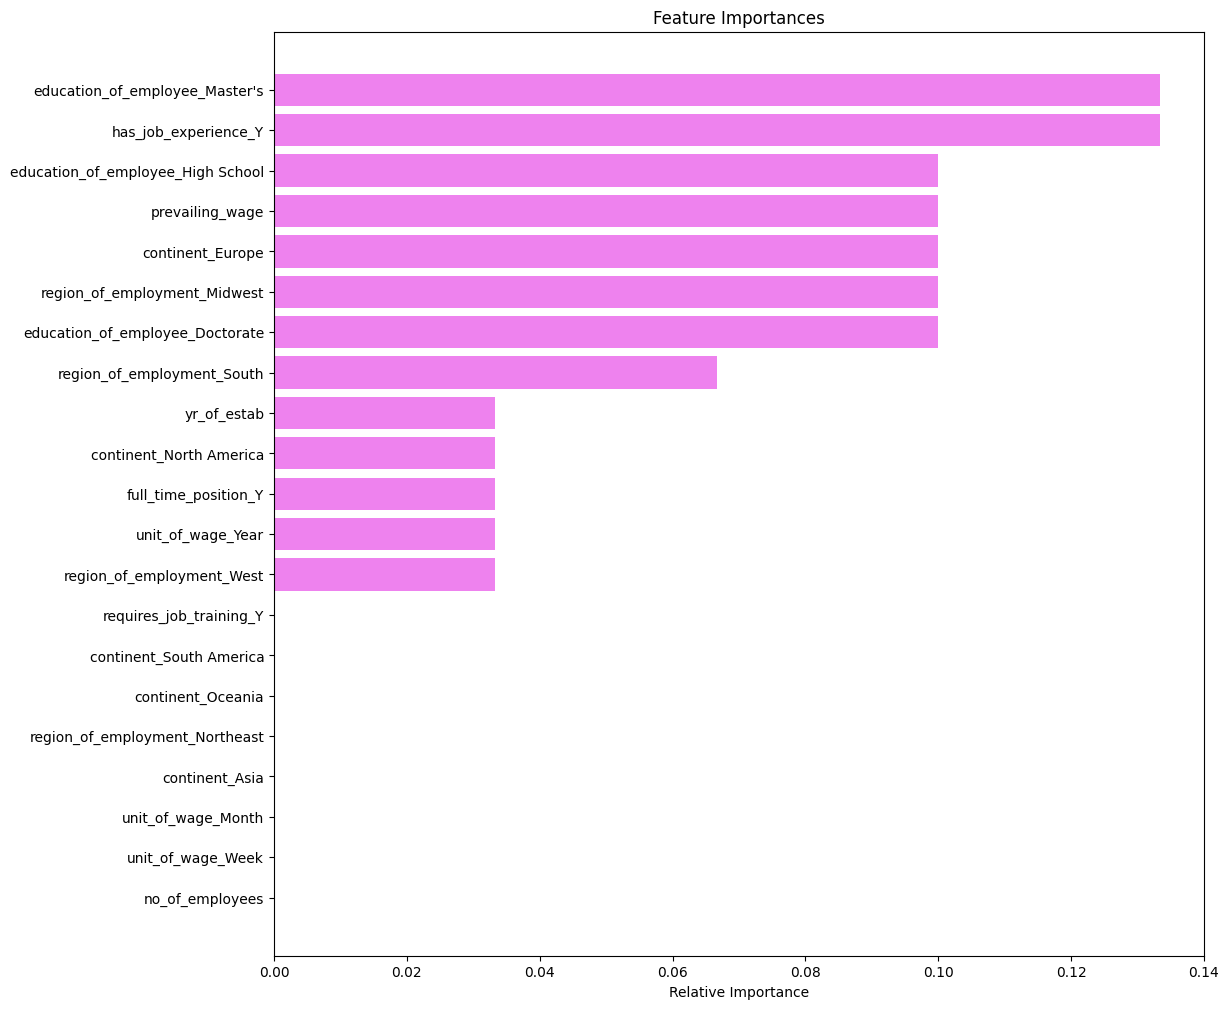

In [ ]:
feature_names = X_train.columns
importances = ab_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Model has given more weightage to the Job experience and master's education, followed by education level at high school, prevailing wages, continent and education at doctorate level.

#### Tuning Gradient Boosting

In [ ]:
# Choose the type of classifier.
gb_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50,200,25),
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7,10]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gb_tuned.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, max_features=0.7, n_estimators=50,
                           random_state=1, subsample=0.9)

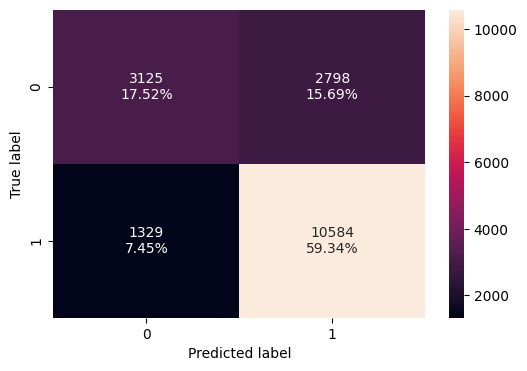

In [ ]:
confusion_matrix_sklearn(gb_tuned, X_train,y_train)

In [ ]:
gb_tuned_model_train_perf = model_performance_classification_sklearn(gb_tuned, X_train,y_train)
print("Training performance \n",gb_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.768614  0.888441   0.790913  0.836845


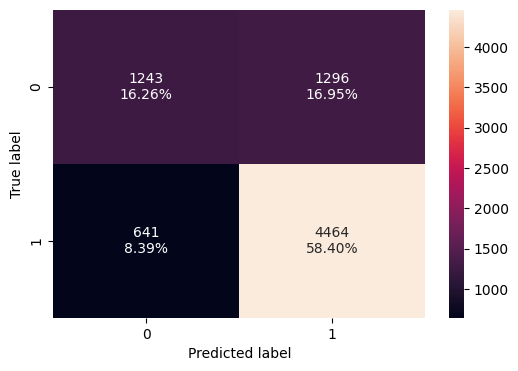

In [ ]:
confusion_matrix_sklearn(gb_tuned, X_test,y_test)

In [ ]:
gb_tuned_model_test_perf = model_performance_classification_sklearn(gb_tuned, X_test, y_test)
print("Testing performance \n",gb_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.746599  0.874437      0.775  0.821721


- It has a good F1 and recall score. Model is generalizing well.

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(gb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
education_of_employee_High School  0.229826
prevailing_wage                    0.148393
has_job_experience_Y               0.139410
education_of_employee_Master's     0.098222
education_of_employee_Doctorate    0.063967
continent_Europe                   0.058747
no_of_employees                    0.046774
yr_of_estab                        0.034487
region_of_employment_Midwest       0.033111
unit_of_wage_Year                  0.032692
region_of_employment_South         0.023156
region_of_employment_West          0.019228
full_time_position_Y               0.016384
continent_North America            0.014750
continent_Asia                     0.010260
region_of_employment_Northeast     0.009749
requires_job_training_Y            0.009231
continent_South America            0.007607
continent_Oceania                  0.002676
unit_of_wage_Month                 0.000985
unit_of_wage_Week                  0.000348


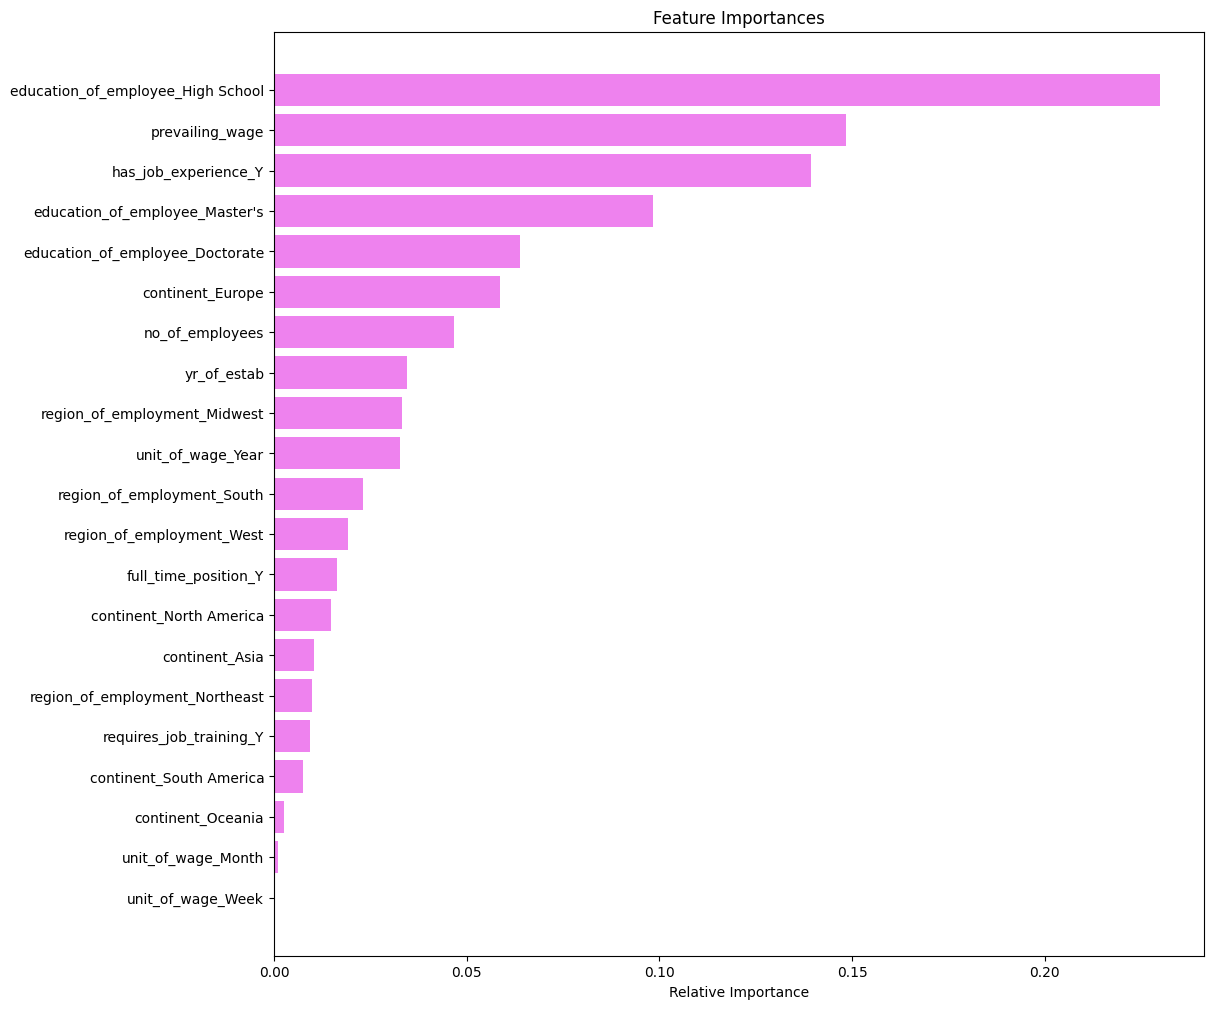

In [ ]:
feature_names = X_train.columns
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Model has given more weightage to the high school education, followed by prevailing wage and job experience.

#### Tuning XGBoosting

In [ ]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, verbosity = 0)

# Grid of parameters to choose from
parameters = {'n_estimators': [75,100,125,150],
              'subsample':[0.7, 0.8, 0.9, 1],
              'gamma':[0, 1, 3, 5],
              'colsample_bytree':[0.7, 0.8, 0.9, 1],
              'colsample_bylevel':[0.7, 0.8, 0.9, 1]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=0.7,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

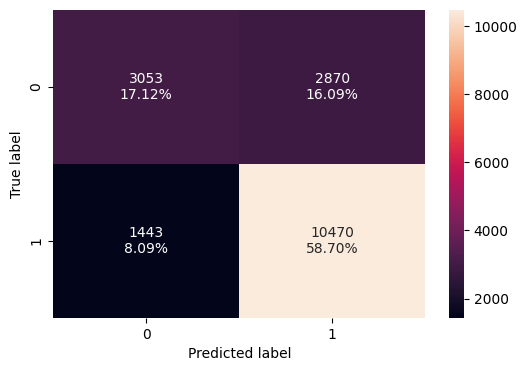

In [ ]:
confusion_matrix_sklearn(xgb_tuned, X_train,y_train)

In [ ]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned, X_train, y_train)
print("Training performance \n",xgb_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.758186  0.878872   0.784858  0.829208


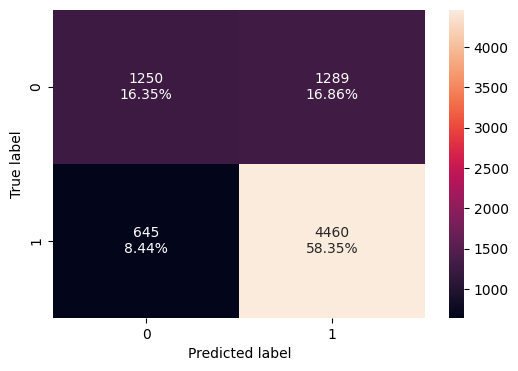

In [ ]:
confusion_matrix_sklearn(xgb_tuned, X_test,y_test)

In [ ]:
xgb_tuned_model_test_perf = model_performance_classification_sklearn(xgb_tuned, X_test, y_test)
print("Testing performance \n",xgb_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.746991  0.873653   0.775787  0.821817


- The model has performed very well. It has good f1 and recall score.

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))


                                        Imp
education_of_employee_High School  0.324380
has_job_experience_Y               0.127785
education_of_employee_Master's     0.101612
education_of_employee_Doctorate    0.056487
continent_Europe                   0.051804
unit_of_wage_Year                  0.050543
region_of_employment_Northeast     0.050265
region_of_employment_West          0.038310
prevailing_wage                    0.036814
continent_North America            0.021463
region_of_employment_South         0.020535
region_of_employment_Midwest       0.019768
full_time_position_Y               0.015161
continent_South America            0.014887
requires_job_training_Y            0.013573
continent_Asia                     0.012422
unit_of_wage_Week                  0.011157
yr_of_estab                        0.009246
no_of_employees                    0.008754
continent_Oceania                  0.008030
unit_of_wage_Month                 0.007006


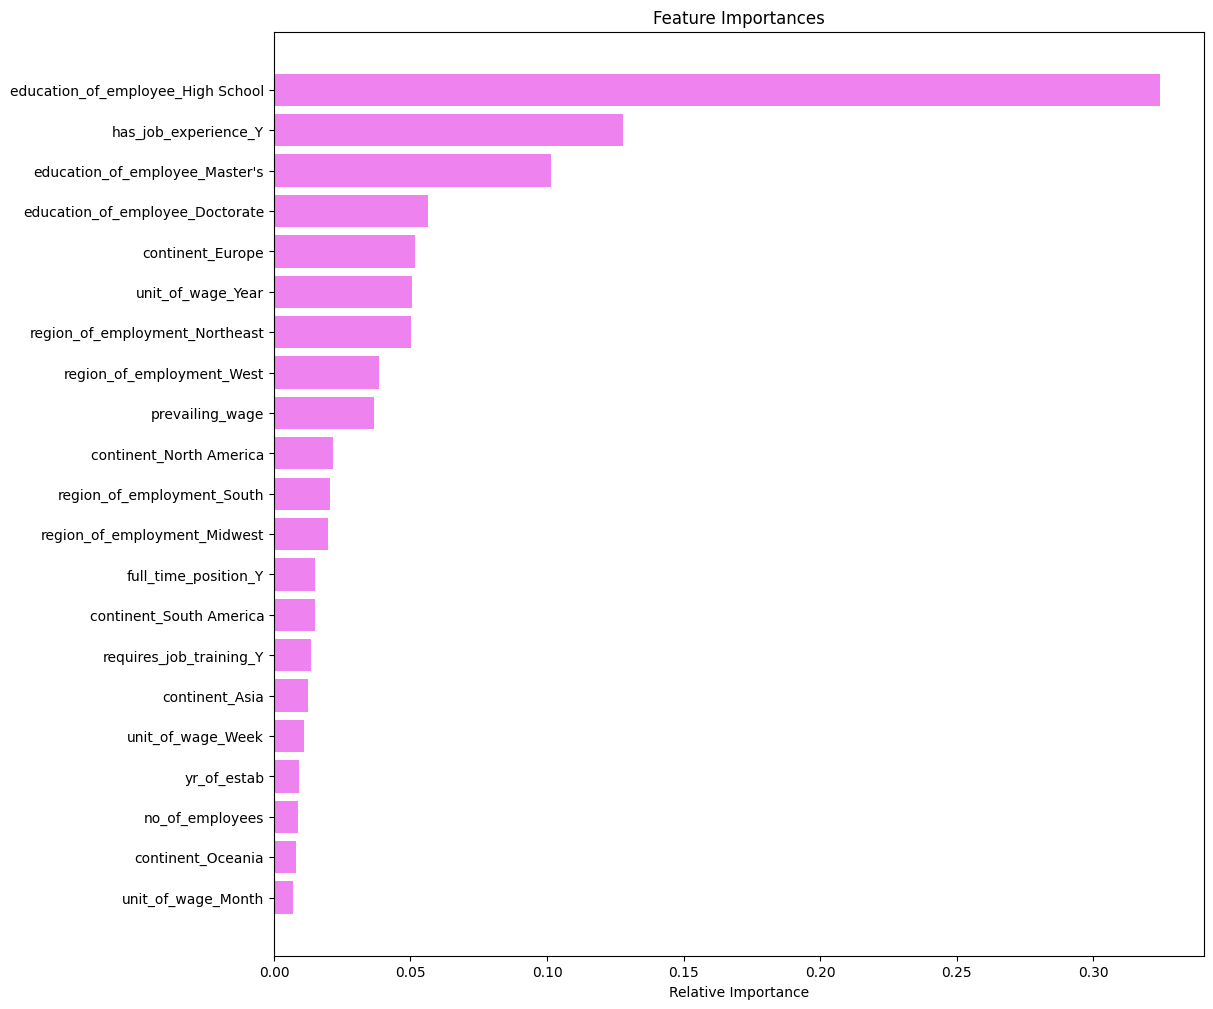

In [ ]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Model has given more importance to the high school level education followed by the job experience and master's education.

## Stacking Model


**Now, let's build a stacking model with the tuned models - decision tree, random forest, and gradient boosting, then use XGBoost to get the final prediction.**

In [ ]:
estimators=[('Decision Tree', dtree_estimator),('Random Forest', rf_estimator_tuned),
           ('Gradient Boosting', gb_tuned)]
final_estimator=XGBClassifier(random_state=1)

In [ ]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.67,
                                                                     1: 0.33},
                                                       max_depth=2,
                                                       max_leaf_nodes=2,
                                                       min_impurity_decrease=0.0001,
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_features='log2',
                                                       max_samples=0.7,
                                                       min_samples_leaf=5,
                                                       n_estimators=110,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassif...
                                                 feature_types=None, gamma=None,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

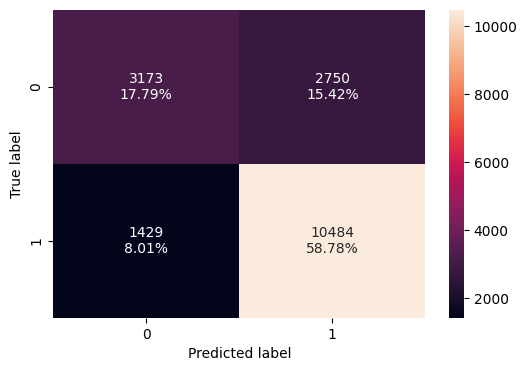

In [ ]:
confusion_matrix_sklearn(stacking_estimator, X_train,y_train)

In [ ]:
stacking_estimator_model_train_perf = model_performance_classification_sklearn(stacking_estimator, X_train, y_train)
print("Training performance \n",stacking_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.765699  0.880047   0.792202  0.833817


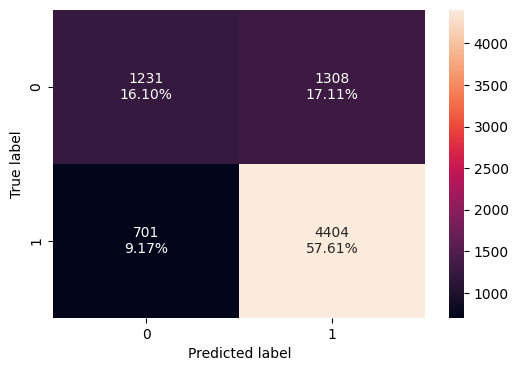

In [ ]:
confusion_matrix_sklearn(stacking_estimator, X_test,y_test)

In [ ]:
stacking_estimator_model_test_perf = model_performance_classification_sklearn(stacking_estimator, X_test, y_test)
print("Testing performance \n",stacking_estimator_model_test_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.765699  0.880047   0.792202  0.833817


- Overall the performance has decreased than tuned XGBoosting.

## Comparing all the models

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
[dtree_model_train_perf.T,
bagging_model_train_perf.T,
bagging_wt_model_train_perf.T,
rf_model_train_perf.T,
rf_wt_model_train_perf.T,
ab_Classifier_model_train_perf.T,
ab_Classifier_wt_model_train_perf.T,
gb_estimator_model_train_perf.T,
xgb_estimator_model_train_perf.T,
##Tuned
dtree_estimator_model_train_perf.T,
bagging_estimator_model_train_perf.T,
rf_estimator_model_train_perf.T,
ab_tuned_model_train_perf.T,
gb_tuned_model_train_perf.T,
xgb_tuned_model_train_perf.T,
stacking_estimator_model_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier",
	"AdaBoosting Classifier",
	"Weighted AdaBoosting Classifier",
	"Gradient Boosting Classifier",
	"XG Boosting Classifier",
    "Decision Tree Estimator",
    "Bagging Estimator",
    "Random Forest Estimator",
	"AdaBoosting Estimator",
	"Gradient Boosting Estimator",
	"XG Boosting Estimator",
	"XGBoosting Stacking Estimator"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Bagging Classifier,Weighted Bagging Classifier,Random Forest Classifier,Weighted Random Forest Classifier,AdaBoosting Classifier,Weighted AdaBoosting Classifier,Gradient Boosting Classifier,XG Boosting Classifier,Decision Tree Estimator,Bagging Estimator,Random Forest Estimator,AdaBoosting Estimator,Gradient Boosting Estimator,XG Boosting Estimator,XGBoosting Stacking Estimator
Accuracy,1.0,0.985367,0.985647,0.999944,1.0,0.738058,1.0,0.759419,0.843575,0.712548,1.0,0.790312,0.738562,0.768614,0.758186,0.765699
Recall,1.0,0.986317,0.987325,0.999916,1.0,0.887434,1.0,0.882901,0.931084,0.931923,1.0,0.904138,0.890876,0.888441,0.878872,0.880047
Precision,1.0,0.991729,0.991152,1.000000,1.0,0.760411,1.0,0.784106,0.849246,0.720067,1.0,0.805670,0.759373,0.790913,0.784858,0.792202
F1,1.0,0.989016,0.989235,0.999958,1.0,0.819027,1.0,0.830576,0.888284,0.812411,1.0,0.852069,0.819885,0.836845,0.829208,0.833817


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
[dtree_model_test_perf.T,
bagging_model_test_perf.T,
bagging_wt_model_test_perf.T,
rf_model_test_perf.T,
rf_wt_model_test_perf.T,
ab_Classifier_model_test_perf.T,
ab_Classifier_wt_model_test_perf.T,
gb_estimator_model_test_perf.T,
xgb_estimator_model_test_perf.T,
##Tuned
dtree_estimator_model_test_perf.T,
bagging_estimator_model_test_perf.T,
rf_estimator_model_test_perf.T,
ab_tuned_model_test_perf.T,
gb_tuned_model_test_perf.T,
xgb_tuned_model_test_perf.T,
stacking_estimator_model_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier",
	"AdaBoosting Classifier",
	"Weighted AdaBoosting Classifier",
	"Gradient Boosting Classifier",
	"XG Boosting Classifier",
    "Decision Tree Estimator",
    "Bagging Estimator",
    "Random Forest Estimator",
	"AdaBoosting Estimator",
	"Gradient Boosting Estimator",
	"XG Boosting Estimator",
	"XGBoosting Stacking Estimator"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Bagging Classifier,Weighted Bagging Classifier,Random Forest Classifier,Weighted Random Forest Classifier,AdaBoosting Classifier,Weighted AdaBoosting Classifier,Gradient Boosting Classifier,XG Boosting Classifier,Decision Tree Estimator,Bagging Estimator,Random Forest Estimator,AdaBoosting Estimator,Gradient Boosting Estimator,XG Boosting Estimator,XGBoosting Stacking Estimator
Accuracy,0.656463,0.692177,0.695840,0.719126,0.722920,0.732993,0.650837,0.744636,0.728545,0.706567,0.720827,0.742020,0.733255,0.746599,0.746991,0.737179
Recall,0.750637,0.766112,0.779432,0.830167,0.842507,0.885015,0.743193,0.873262,0.855044,0.930852,0.888541,0.873262,0.887365,0.874437,0.873653,0.862684
Precision,0.739055,0.771400,0.768443,0.768032,0.765984,0.756530,0.736413,0.773555,0.765789,0.715447,0.743485,0.770880,0.755756,0.775000,0.775787,0.771008
F1,0.744801,0.768747,0.773899,0.797891,0.802425,0.815744,0.739787,0.820390,0.807959,0.809058,0.809566,0.818883,0.816290,0.821721,0.821817,0.814274


**Observations**
- Decision tree performed well on training and test set after tuning. Before tuning it was overfitting.
- Bagging classifier improved after tuning.
- Random Forest with default parameters overfitted the model. Performed well after tuning
- Random forest after tuning performed slightly well than tuned decision tree.
- Gradient boosting classifier/ estimator and XG Boosting Estimator has good f1 score.
- Tuned XGBoosting has more better f1 score and overall performing well.
- As the final results depend on the parameters used/checked using GridSearchCV, there may be yet better parameters which may result in a better performance.

## Feature importance of Stacking

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(xgb_tuned, X_train, y_train, n_repeats=10, random_state=42, n_jobs=-1)
perm_importances = pd.DataFrame(result.importances_mean, columns=["Imp"], index=X_train.columns).sort_values(by="Imp", ascending=False)
print(perm_importances)

                                        Imp
education_of_employee_High School  0.051867
has_job_experience_Y               0.038557
education_of_employee_Master's     0.019948
prevailing_wage                    0.015575
education_of_employee_Doctorate    0.010271
continent_Europe                   0.007591
region_of_employment_West          0.006313
continent_North America            0.006268
unit_of_wage_Year                  0.005478
region_of_employment_Midwest       0.004407
region_of_employment_Northeast     0.003515
requires_job_training_Y            0.003302
region_of_employment_South         0.002949
yr_of_estab                        0.002871
full_time_position_Y               0.002714
continent_South America            0.001570
continent_Asia                     0.001233
no_of_employees                    0.001032
unit_of_wage_Month                 0.000151
unit_of_wage_Week                  0.000062
continent_Oceania                 -0.000151


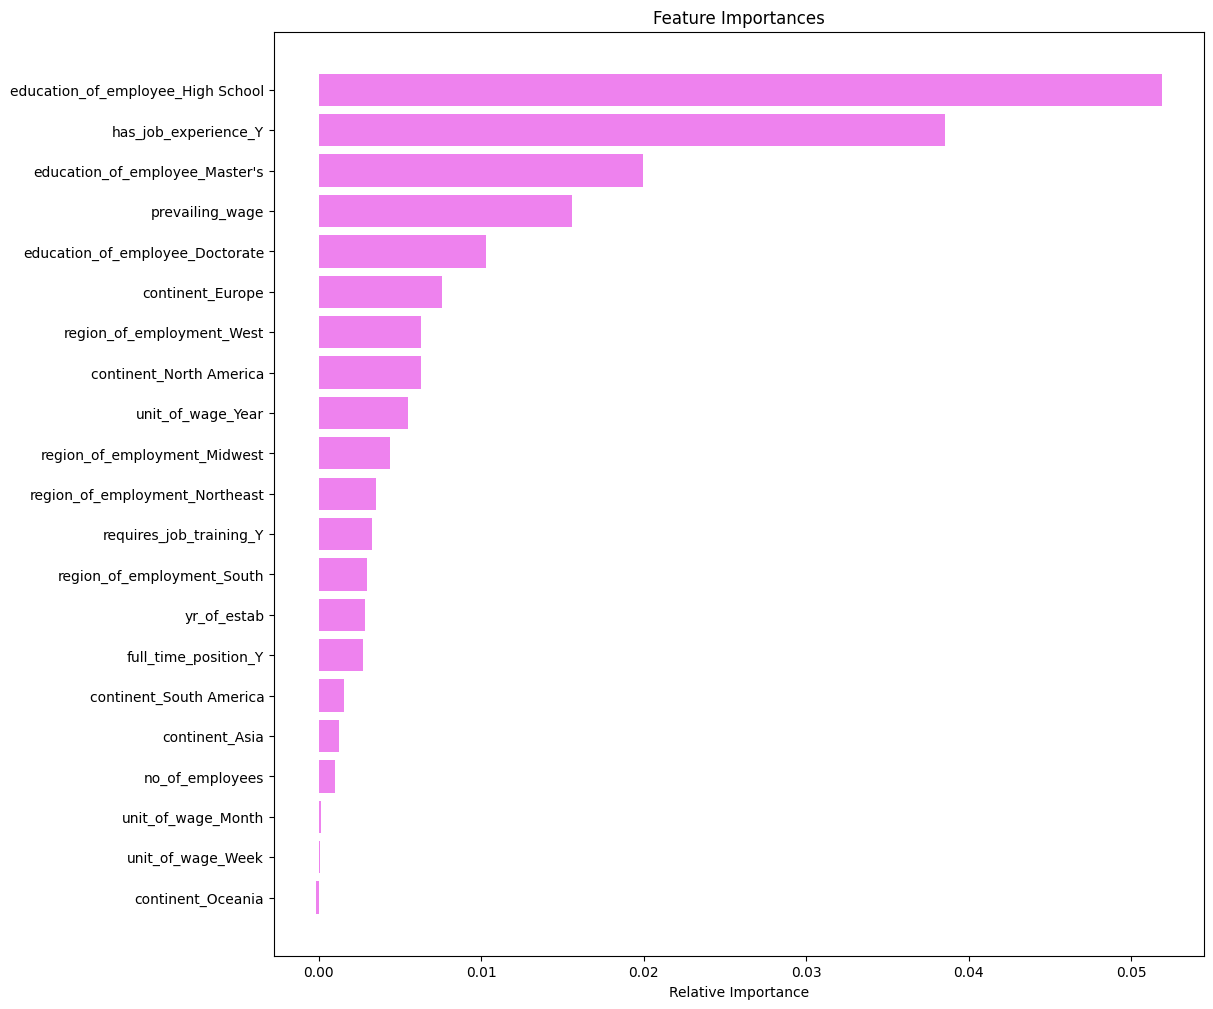

In [ ]:
importances = pd.DataFrame(result.importances_mean, columns=["Imp"], index=X_train.columns).sort_values(by="Imp", ascending=True)

# Re-index the sorted importances for plotting
indices = importances.index

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances['Imp'][indices], color='violet', align='center')
plt.yticks(range(len(indices)), indices)
plt.xlabel('Relative Importance')
plt.show()

- High School Education and Job experience are the most important feature for prediction followed by prevalling wage, Continent.

# Cross Validation and Model Tuning

## Data Preprocessing

### Feature Engineering

In [ ]:
df1=Data.copy()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
# we need to pass numerical values for each categorical column for imputation so we will label encode them
continent = {"Asia": 0, "Africa": 1, "North America": 2, "Europe":3, "South America":4, "Oceania":5}
df1["continent"] = df1["continent"].map(continent)

education_of_employee = {"High School": 0, "Master's": 1, "Bachelor's": 2, "Doctorate": 3}
df1["education_of_employee"] = df1["education_of_employee"].map(education_of_employee)

has_job_experience = {'N':0, 'Y':1}
df1["has_job_experience"] = df1["has_job_experience"].map(has_job_experience)

requires_job_training = {'N':0, 'Y':1}
df1["requires_job_training"] = df1["requires_job_training"].map(requires_job_training)


region_of_employment ={'West':0, 'Northeast':1, 'South':2, 'Midwest':3, 'Island':4}
df1["region_of_employment"] = df1["region_of_employment"].map(region_of_employment)

unit_of_wage = {'Hour':0, 'Year':3, 'Week':1, 'Month':2}
df1["unit_of_wage"] = df1["unit_of_wage"].map(unit_of_wage)

full_time_position={'Y':1, 'N':0}
df1["full_time_position"] = df1["full_time_position"].map(full_time_position)


In [ ]:
df1.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,0,0,0,0,14513,2007,0,592.2029,0,1,Denied
1,EZYV02,0,1,1,0,2412,2002,1,83425.6500,3,1,Certified
2,EZYV03,0,2,0,1,44444,2008,0,122996.8600,3,1,Denied
3,EZYV04,0,2,0,0,98,1897,0,83434.0300,3,1,Denied
4,EZYV05,1,1,1,0,1082,2005,2,149907.3900,3,1,Certified


- We have assigned the numerical values to each categorical column.
- Job training needed / experience / full time position 'Y' and 'N' has been assigned 1 and 0 respectively.
- Wages unit has been assigned 0,1,2,and 3 respectively for Hour, Week, Month, Year.
- Region of employment has been assigned 0,1,2,3,and 4 respectively for 'West', "Northeast', 'South', 'Midwest', and 'Island'.
- Education of the employee has been assigned 0,1,2, and 3 respectively for High School, Batchelor's, Master's, and Doctorate.

### Data Preparation for Modeling

In [ ]:
df1= df1.drop(["case_id"], axis=1)
X = df1.drop(["case_status"], axis=1)
y = df1["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

In [ ]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(15288, 10) (5096, 10) (5096, 10)


In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 15288
Number of rows in validation data = 5096
Number of rows in test data = 5096


### Missing Value Treatment
- we don't have missing values

### Reverse Mapping for Encoded Variables

In [ ]:
## Function to inverse the encoding
def inverse_mapping(x, y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype("category")
    X_val[y] = np.round(X_val[y]).map(inv_dict).astype("category")
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype("category")

In [ ]:
inverse_mapping(continent, "continent")
inverse_mapping(education_of_employee, "education_of_employee")
inverse_mapping(has_job_experience, "has_job_experience")
inverse_mapping(requires_job_training, "requires_job_training")
inverse_mapping(region_of_employment, "region_of_employment")
inverse_mapping(unit_of_wage, "unit_of_wage")
inverse_mapping(full_time_position, "full_time_position")

#### `Train Dataset`

In [ ]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

continent
Asia             10085
Europe            2285
North America     1944
South America      528
Africa             333
Oceania            113
Name: count, dtype: int64
******************************
education_of_employee
Bachelor's     6141
Master's       5792
High School    2045
Doctorate      1310
Name: count, dtype: int64
******************************
has_job_experience
Y    8845
N    6443
Name: count, dtype: int64
******************************
requires_job_training
N    13477
Y     1811
Name: count, dtype: int64
******************************
region_of_employment
Northeast    4312
South        4248
West         3920
Midwest      2576
Island        232
Name: count, dtype: int64
******************************
unit_of_wage
Year     13786
Hour      1286
Week       156
Month       60
Name: count, dtype: int64
******************************
full_time_position
Y    13678
N     1610
Name: count, dtype: int64
******************************


#### `Validation Dataset`

In [ ]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

continent
Asia             3395
Europe            713
North America     655
South America     173
Africa            121
Oceania            39
Name: count, dtype: int64
******************************
education_of_employee
Bachelor's     2033
Master's       1886
High School     694
Doctorate       483
Name: count, dtype: int64
******************************
has_job_experience
Y    2963
N    2133
Name: count, dtype: int64
******************************
requires_job_training
N    4501
Y     595
Name: count, dtype: int64
******************************
region_of_employment
Northeast    1430
South        1389
West         1352
Midwest       855
Island         70
Name: count, dtype: int64
******************************
unit_of_wage
Year     4576
Hour      452
Week       57
Month      11
Name: count, dtype: int64
******************************
full_time_position
Y    4552
N     544
Name: count, dtype: int64
******************************


#### `Test Dataset`

In [ ]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

continent
Asia             3381
Europe            734
North America     693
South America     151
Africa             97
Oceania            40
Name: count, dtype: int64
******************************
education_of_employee
Bachelor's     2060
Master's       1956
High School     681
Doctorate       399
Name: count, dtype: int64
******************************
has_job_experience
Y    2994
N    2102
Name: count, dtype: int64
******************************
requires_job_training
N    4547
Y     549
Name: count, dtype: int64
******************************
region_of_employment
Northeast    1453
South        1380
West         1314
Midwest       876
Island         73
Name: count, dtype: int64
******************************
unit_of_wage
Year     4600
Hour      419
Week       59
Month      18
Name: count, dtype: int64
******************************
full_time_position
Y    4543
N     553
Name: count, dtype: int64
******************************


* Inverse mapping returned original labels.

### Creating Dummy Variables

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(15288, 21) (5096, 21) (5096, 21)


In [ ]:
X_train

,no_of_employees,yr_of_estab,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,...,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
5008,1020,2008,70919.85,True,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,True,True
12951,1624,2003,59082.94,False,True,False,False,False,False,False,...,True,True,False,True,False,False,False,False,True,True
3214,438,1991,22235.80,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,True
18876,211,1911,18937.37,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
21939,2696,2007,65906.82,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9067,2108,1959,17831.22,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,True
22332,3306,1952,10990.90,False,True,False,False,False,False,False,...,True,False,False,False,True,False,False,False,True,True
9681,566,1965,72238.79,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,True
1866,3216,2003,137833.91,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


## Model Building

### Model evaluation criterion
**Model can make wrong predictions as:**

- Predicting an employee will get certified and the employee doesn't get certified

- Predicting an employee will not get certified and the employee get certified

**Which case is more important**?

- Predicting that employee will not get certified but he/she certified i.e. not providing valuable to the employee.

**How to reduce this loss i.e need to reduce False Negatives?**

- Company wants Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the company can provide US visa certification to the deserving employes.


## Initial Model Building

### Model Building - Original Data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9888344760039177
Random forest: 1.0
GBM: 0.8796278158667973
Adaboost: 0.8877571008814887
dtree: 1.0

Validation Performance:

Bagging: 0.7831962397179788
Random forest: 0.8407755581668626
GBM: 0.8742655699177438
Adaboost: 0.8821974148061105
dtree: 0.745005875440658


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9888, Validation Score: 0.7832, Difference: 0.2056
Random forest: Training Score: 1.0000, Validation Score: 0.8408, Difference: 0.1592
GBM: Training Score: 0.8796, Validation Score: 0.8743, Difference: 0.0054
Adaboost: Training Score: 0.8878, Validation Score: 0.8822, Difference: 0.0056
dtree: Training Score: 1.0000, Validation Score: 0.7450, Difference: 0.2550


-	Lowest difference observed in gradient boosting and ada boosting method.

### Model Building - Oversampled Data

In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape[0]))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape[0]))

Before Oversampling, counts of label 'Yes': 10210
Before Oversampling, counts of label 'No': 5078 

After Oversampling, counts of label 'Yes': 10210
After Oversampling, counts of label 'No': 10210 

After Oversampling, the shape of train_X: 20420
After Oversampling, the shape of train_y: 20420 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9827619980411362
Random forest: 1.0
GBM: 0.8514201762977474
Adaboost: 0.844564152791381
dtree: 1.0

Validation Performance:

Bagging: 0.7511750881316098
Random forest: 0.8131609870740305
GBM: 0.8448883666274971
Adaboost: 0.8425381903642774
dtree: 0.717978848413631


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9828, Validation Score: 0.7512, Difference: 0.2316
Random forest: Training Score: 1.0000, Validation Score: 0.8132, Difference: 0.1868
GBM: Training Score: 0.8514, Validation Score: 0.8449, Difference: 0.0065
Adaboost: Training Score: 0.8446, Validation Score: 0.8425, Difference: 0.0020
dtree: Training Score: 1.0000, Validation Score: 0.7180, Difference: 0.2820


- Lowest difference observed in gradient boosting and ada boosting method.

### Model Building - Undersampled Data

In [ ]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 10210
Before Under Sampling, counts of label 'No': 5078 

After Under Sampling, counts of label 'Yes': 5078
After Under Sampling, counts of label 'No': 5078 

After Under Sampling, the shape of train_X: (10156, 21)
After Under Sampling, the shape of train_y: (10156,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9686884600236314
Random forest: 1.0
GBM: 0.7483261126427727
Adaboost: 0.7176053564395432
dtree: 1.0

Validation Performance:

Bagging: 0.6178025851938895
Random forest: 0.6742068155111633
GBM: 0.7320799059929495
Adaboost: 0.7074030552291422
dtree: 0.631316098707403


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9687, Validation Score: 0.6178, Difference: 0.3509
Random forest: Training Score: 1.0000, Validation Score: 0.6742, Difference: 0.3258
GBM: Training Score: 0.7483, Validation Score: 0.7321, Difference: 0.0162
Adaboost: Training Score: 0.7176, Validation Score: 0.7074, Difference: 0.0102
dtree: Training Score: 1.0000, Validation Score: 0.6313, Difference: 0.3687


- Lowest difference observed in gradient boosting and ada boosting method.

- We are going to train our the GBM and Adaboost models on an undersampled dataset, as well as the GBM model trained on an oversampled dataset, followed by tune them to understand how it performs.

## Hyperparameter Tuning

### Tuning AdaBoostClassifier model with Undersampled data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 10, 'learning_rate': 0.01, 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=0.9312726426438074:
CPU times: user 1.6 s, sys: 260 ms, total: 1.86 s
Wall time: 1min 14s


In [ ]:
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=20,
    learning_rate=0.1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=20, random_state=1)

In [ ]:
# Checking model's performance on training set
adb_train = model_performance_classification_sklearn(tuned_adb, X_train_un, y_train_un)
adb_train

,Accuracy,Recall,Precision,F1
0,0.703525,0.7436,0.688423,0.714948


In [ ]:
# Checking model's performance on validation set
adb_val = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
adb_val

,Accuracy,Recall,Precision,F1
0,0.71978,0.740599,0.822244,0.779289


### Tuning  Gradient Boosting model with Undersampled Data

In [ ]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(125,175,25),
    "learning_rate": [0.01, 0.2, 0.05, 1],
    "subsample":[0.8,0.9,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 150, 'max_features': 1, 'learning_rate': 0.01, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.7861380473992474:
CPU times: user 4.54 s, sys: 567 ms, total: 5.11 s
Wall time: 4min 34s


In [ ]:
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=150,
    max_features=1,
    learning_rate=0.01,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=1, n_estimators=150,
                           random_state=1, subsample=0.9)

In [ ]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train_un, y_train_un
)
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.705396,0.757385,0.686051,0.719955


In [ ]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.718014,0.743831,0.817565,0.778957


### Tuning Gradient Boosting model with Oversampled data

In [ ]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.01, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8919686581782565:
CPU times: user 8.48 s, sys: 759 ms, total: 9.24 s
Wall time: 6min 13s


In [ ]:
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=1,
    learning_rate=0.01,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm2.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=1, n_estimators=125,
                           random_state=1, subsample=0.7)

In [ ]:
# Checking model's performance on training set
gbm2_train = model_performance_classification_sklearn(tuned_gbm1, X_train_over, y_train_over)
gbm2_train

,Accuracy,Recall,Precision,F1
0,0.696817,0.753379,0.676815,0.713048


In [ ]:
# Checking model's performance on validation set
gbm2_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.718014,0.743831,0.817565,0.778957


## Model Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        gbm2_train.T,
        adb_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data
Accuracy,0.705396,0.696817,0.703525
Recall,0.757385,0.753379,0.743600
Precision,0.686051,0.676815,0.688423
F1,0.719955,0.713048,0.714948


In [ ]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [ gbm1_val.T, gbm2_val.T, adb_val.T], axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data
Accuracy,0.718014,0.718014,0.719780
Recall,0.743831,0.743831,0.740599
Precision,0.817565,0.817565,0.822244
F1,0.778957,0.778957,0.779289


- All the tuned models are performing well on validation data set. However, Adaboosting shows best f1 and recall score.
- Now we can actually compare how our model is performing on test data.

In [ ]:
# Let's check the performance on test set
ada_test = model_performance_classification_sklearn(tuned_adb, X_test, y_test)
ada_test

,Accuracy,Recall,Precision,F1
0,0.714089,0.75235,0.806614,0.778538


- The Adaboost model trained on undersampled data has given ~75% recall on the test set
- This performance is in line with what we achieved with this model on the train and validation sets
- So, this is a generalized model

### Feature Importance

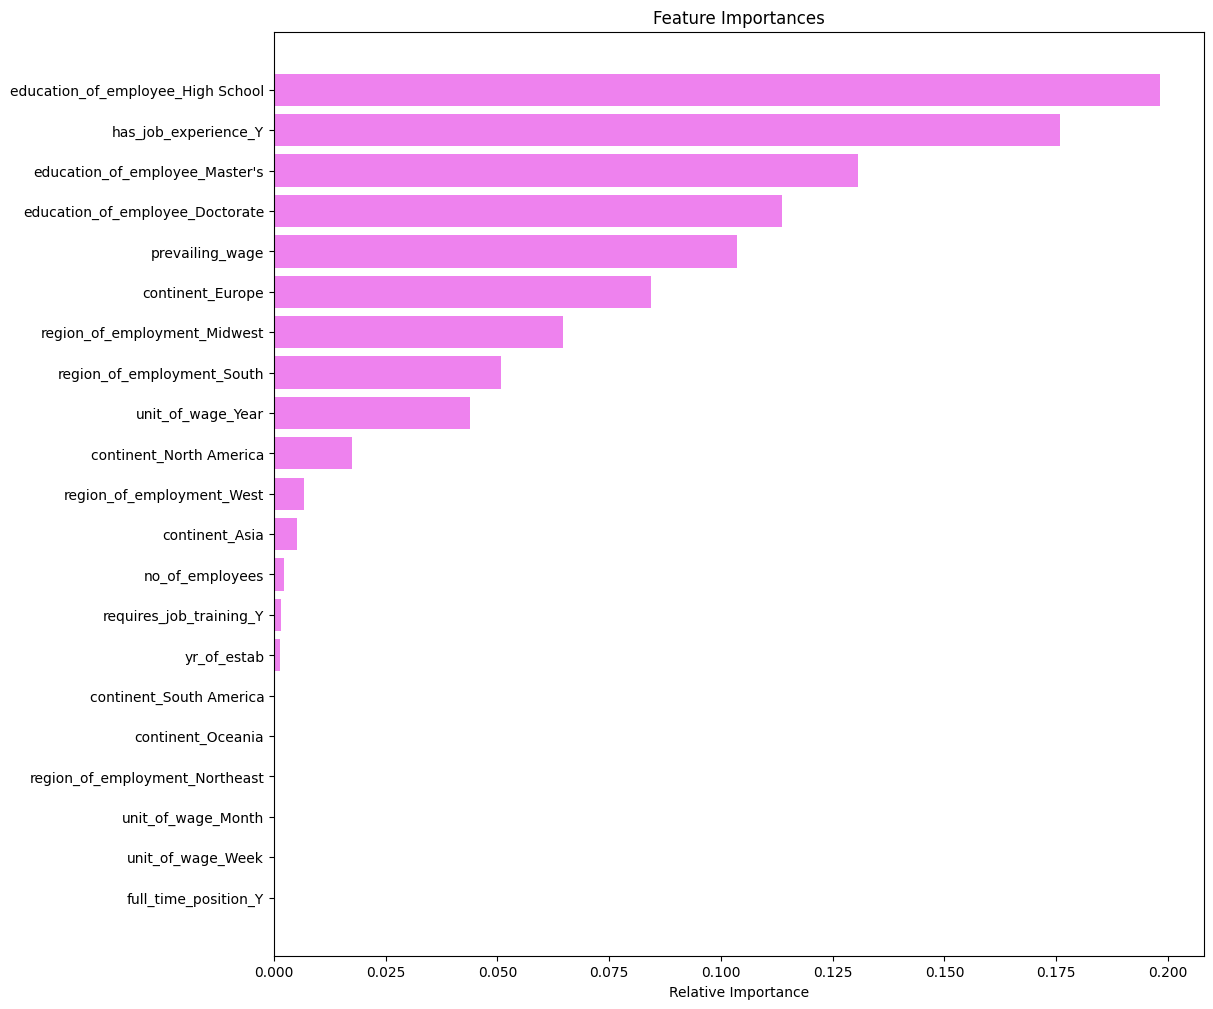

In [ ]:
feature_names = X_train.columns
importances = tuned_adb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- The most important features are education of the employee and job experience.

## **Actionable Insights & Recommendations**
---

1. Develop an initial filtering system that prioritizes candidates with a high school education in the early stages of the review process. This will help reduce processing time for these cases, leading to a more efficient workflow.

2. Include job experience as a weighted feature in the machine learning model to prioritize applicants with substantial work history. Employers should be encouraged to emphasize the relevant experience of foreign workers to increase their chances of certification.

3. Create additional ranking tiers within the model based on educational qualifications, giving higher preference to candidates with advanced degrees. This could serve as a secondary filter for applicants after job experience and high school education.

4. Implement wage thresholds in the model to ensure that candidates with salaries meeting or exceeding these levels are ranked higher. Companies should be made aware of the importance of offering competitive wages to foreign workers, as this significantly improves their visa approval chances.

5. Consider regional data as a feature in the machine learning model. Emphasize outreach and talent acquisition efforts in European countries and US regions where visa certification is more likely to succeed.

6. Avoid overfitting the model by downweighting less impactful variables. Focus resources and automation efforts on the key drivers (education, experience, wages, and region) to ensure a streamlined and accurate certification process.